In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import statsmodels.api as sm

# Описание датасета

Датасет одной из самых популярных футбольных компьютерных игр - FIFA 20, содеражащий информацию об игроках и их различных характрестик.

Датасет содержит 18 278 игроков со 104 различными атрибутами.

In [16]:
csv_path = r"C:\Users\user\.cache\kagglehub\datasets\stefanoleone992\fifa-20-complete-player-dataset\versions\1\players_20.csv"

df = pd.read_csv(csv_path, low_memory=False)
print(df.shape)
df.head()

(18278, 104)


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

# Первичный анализ данных

## Тип переменных датасета

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [18]:
dtypes_table = (
    df.dtypes
      .astype(str)
      .reset_index()
      .rename(columns={"index": "column", 0: "pandas_dtype"})
      .sort_values(["pandas_dtype", "column"])
)

display(dtypes_table)

column pandas_dtype
28  contract_valid_until      float64
35             defending      float64
34             dribbling      float64
37             gk_diving      float64
38           gk_handling      float64
..                   ...          ...
98                   rwb       object
2             short_name       object
79                    st       object
24         team_position       object
19             work_rate       object

[104 rows x 2 columns]

## Описательная статистика

In [19]:
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [20]:
df['team_position'].value_counts()

team_position
SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: count, dtype: int64

## Амплуа игроков

На основе признака team_position - позиция игрока в команде, создадим признак role, который будет говорить об амплуа игрока (goalkeeper, defenderr, midfielder, forward). Затем с помощью различных гистограмм посмотрим на их распределение.

In [21]:
pos = df["team_position"].astype(str).str.upper().str.strip()

df["role"] = np.select(
    [
        pos.eq("GK"),                                     # goalkeeper
        pos.str.contains("B", na=False),                  # defender
        pos.str.contains("M", na=False),                  # midfielder
        pos.str.contains("F", na=False) | pos.isin(["ST", "LW", "RW"])  # forward
    ],
    ["goalkeeper", "defender", "midfielder", "forward"],
    default=np.nan
)


display(df[["team_position", "role"]].head(20))
display(df["role"].value_counts())

team_position        role
0             RW     forward
1             LW     forward
2            CAM  midfielder
3             GK  goalkeeper
4             LW     forward
5            RCM  midfielder
6             GK  goalkeeper
7            LCB    defender
8            RCM  midfielder
9             RW     forward
10            RW     forward
11           LCB    defender
12            ST     forward
13            GK  goalkeeper
14            GK  goalkeeper
15           RCM  midfielder
16           LCB    defender
17            ST     forward
18           LCB    defender
19            ST     forward

role
defender      10476
nan            3588
midfielder     2719
forward         833
goalkeeper      662
Name: count, dtype: int64

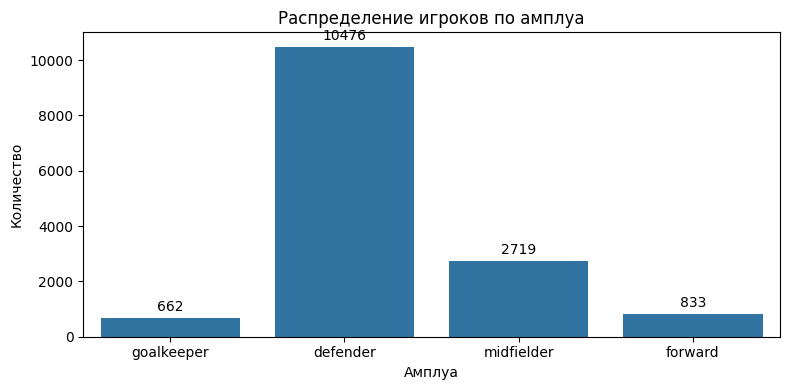

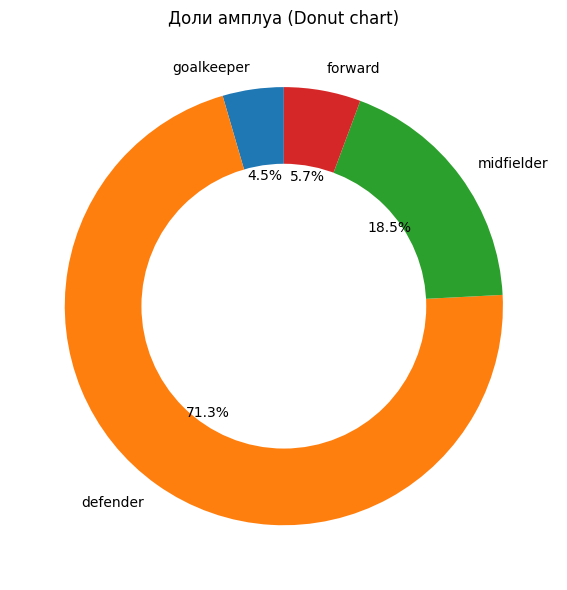

In [22]:
role_order = ["goalkeeper", "defender", "midfielder", "forward"]

df["role"] = pd.Categorical(df["role"], categories=role_order, ordered=True)

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x="role", order=role_order)
ax.set_title("Распределение игроков по амплуа")
ax.set_xlabel("Амплуа")
ax.set_ylabel("Количество")

# подписи над столбцами
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10, xytext=(0, 3),
                textcoords="offset points")
plt.tight_layout()
plt.show()


role_counts = df["role"].value_counts(dropna=False).reindex(role_order)
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    role_counts.values,
    labels=role_counts.index,
    autopct=lambda p: f"{p:.1f}%",
    startangle=90
)

centre_circle = plt.Circle((0, 0), 0.65, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Доли амплуа (Donut chart)")
plt.tight_layout()
plt.show()

In [23]:
role_counts_df = (
    df["role"].value_counts(dropna=False)
      .rename_axis("role")
      .reset_index(name="count")
)

fig = px.bar(
    role_counts_df,
    x="role",
    y="count",
    title="Амплуа: интерактивное диаграмма",
    text="count"
)
fig.update_traces(textposition="outside")
fig.update_layout(xaxis_title="Амплуа", yaxis_title="Количество")
fig.show()


## Зависимые переменные

### Основные характеристики игрока и их общий рейтинг

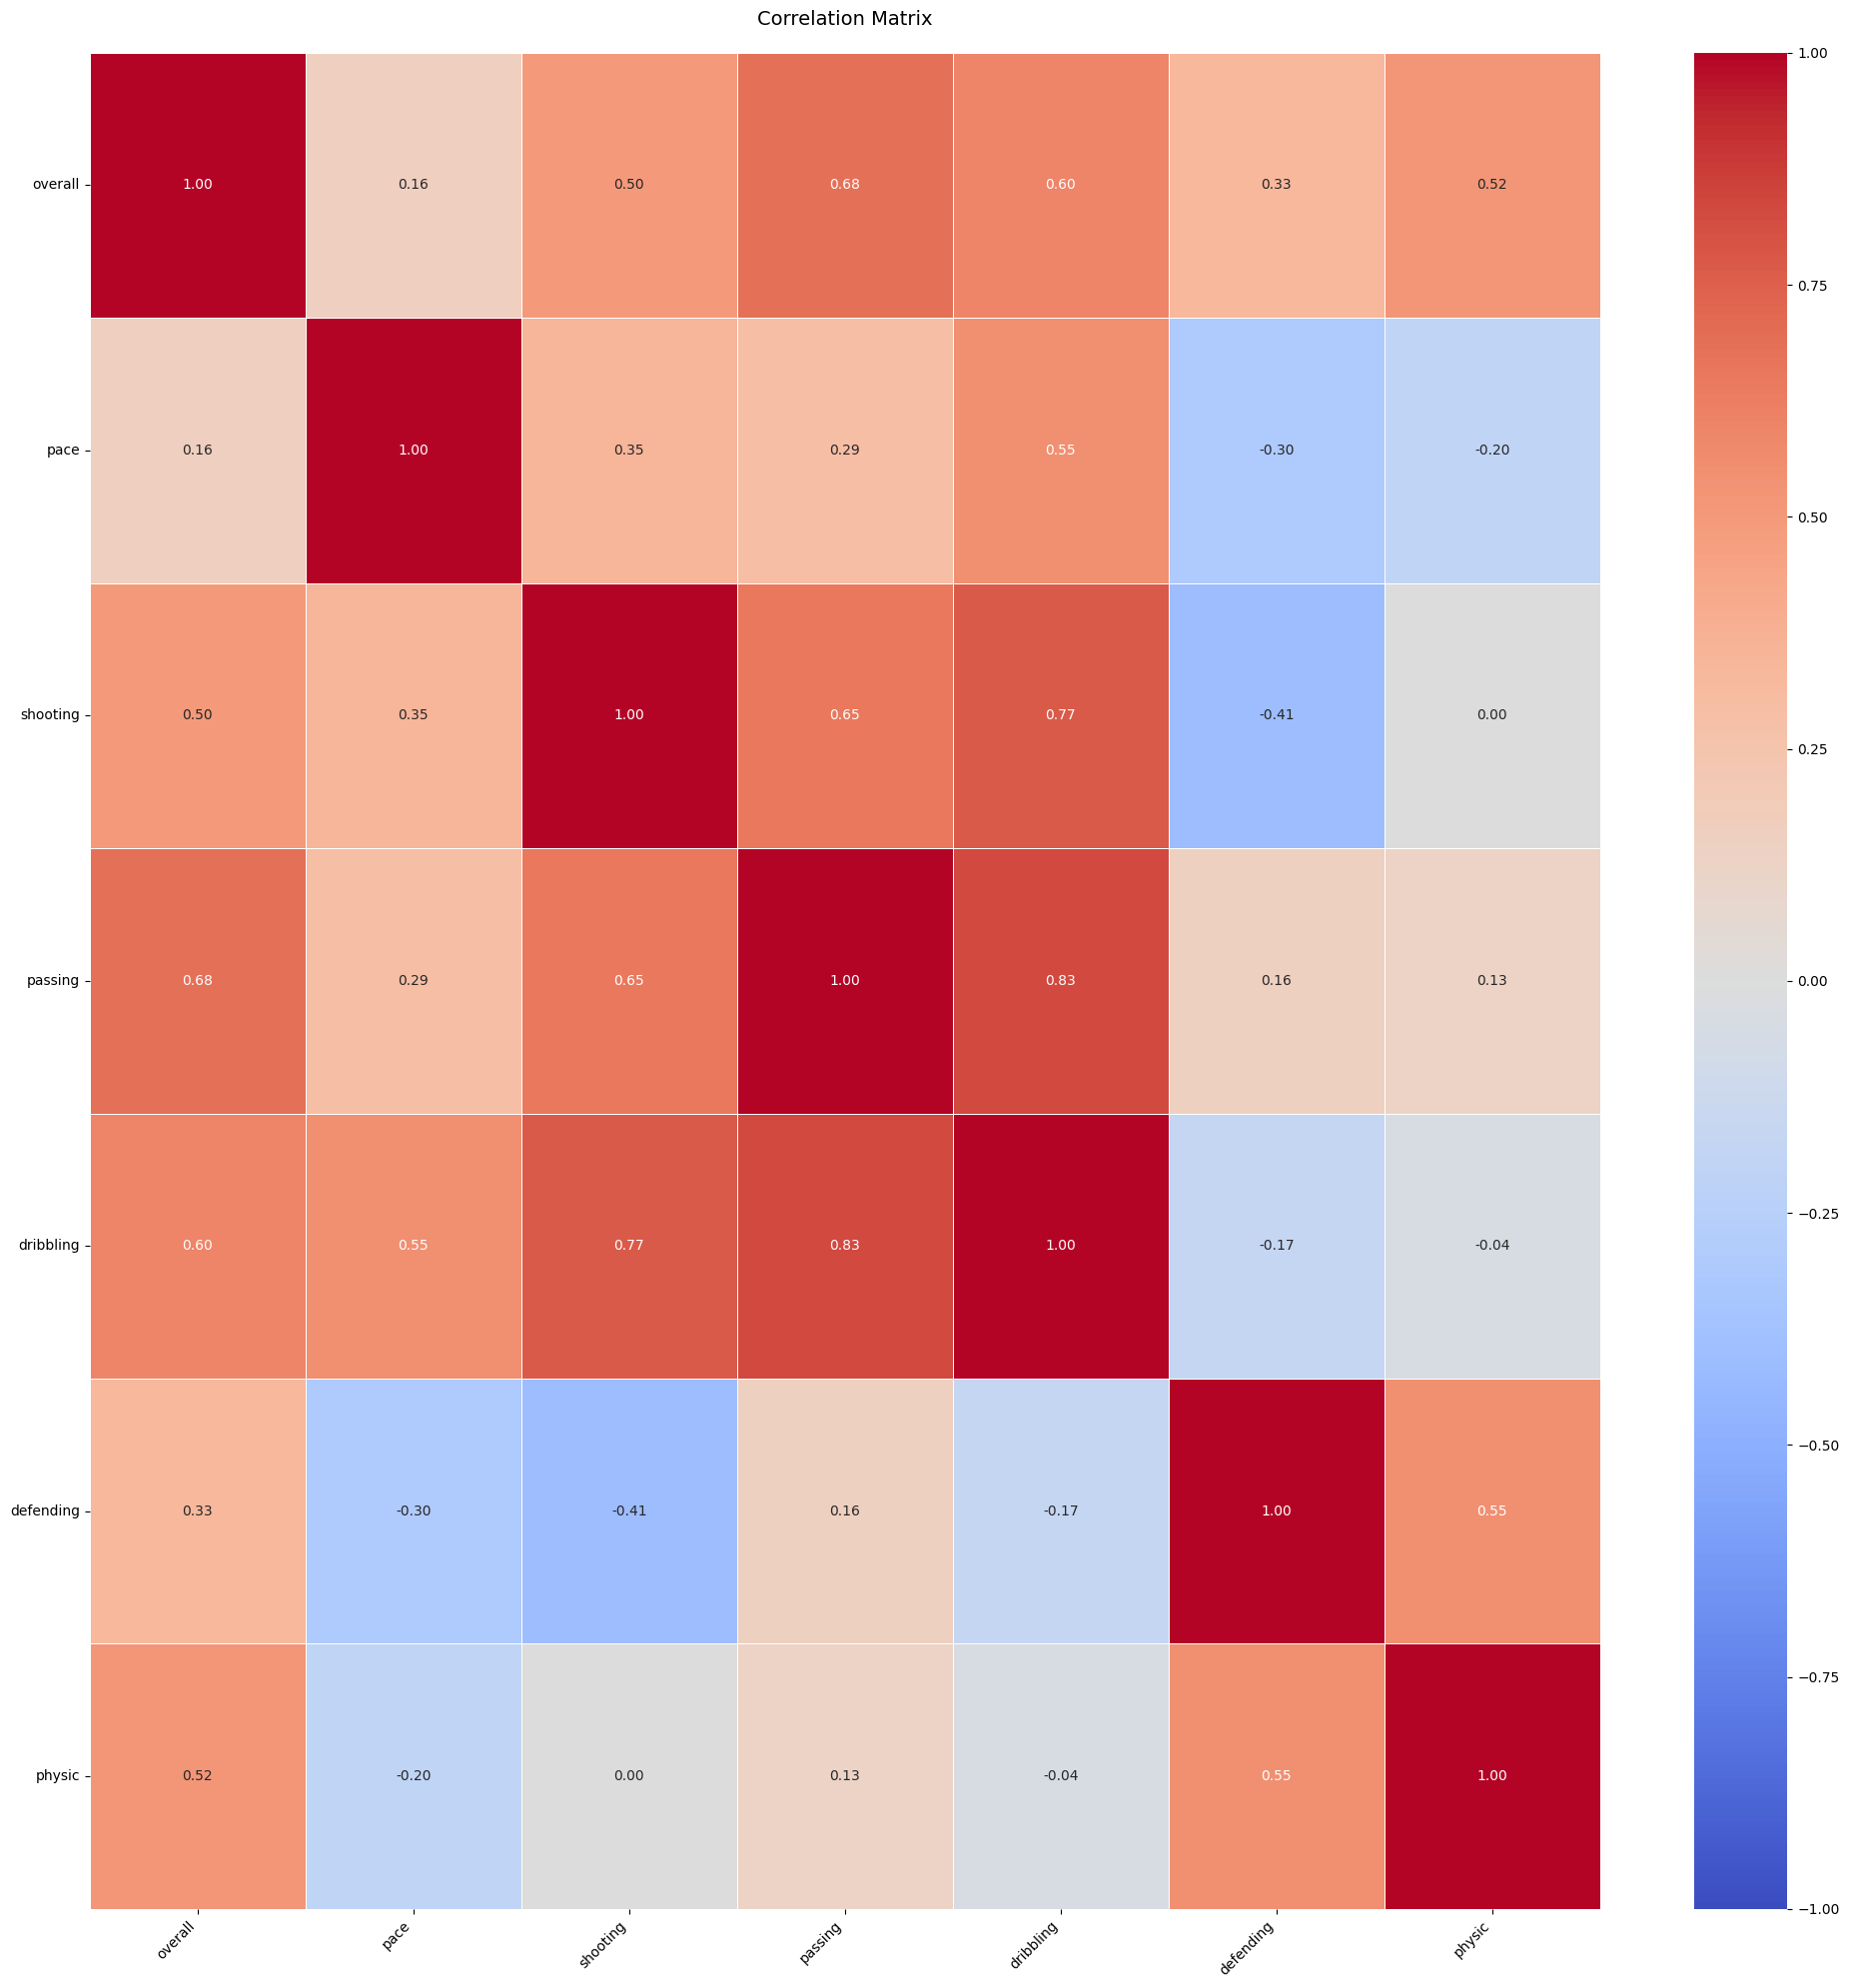

In [24]:
cols = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

corr_matrix = df[cols].corr()

plt.figure(figsize=(20, 20))

heatmap = sns.heatmap(
    data=corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 10}
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    ha="right",
    fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=10
)

plt.title("Correlation Matrix", pad=20, fontsize=14)
plt.tight_layout()
plt.show()

Можно наблюдать достаточно сильные связи между признаками, особенно между dribbling и passing, dribling и shooting.

### Потенциал игрока и возраст

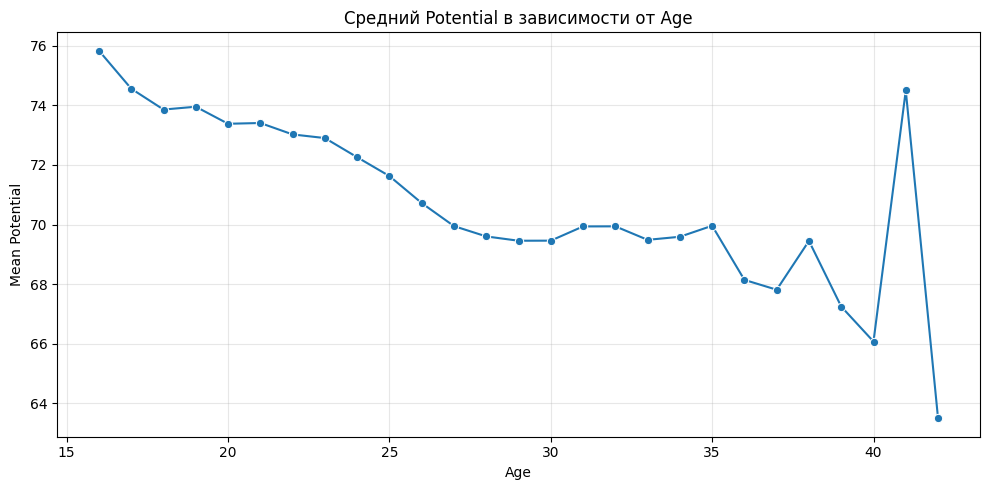

In [25]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["potential"] = pd.to_numeric(df["potential"], errors="coerce")

tmp = (df[["age", "potential"]]
       .dropna()
       .groupby("age", as_index=False)["potential"]
       .mean()
       .sort_values("age"))

plt.figure(figsize=(10, 5))
sns.lineplot(data=tmp, x="age", y="potential", marker="o")
plt.title("Средний Potential в зависимости от Age")
plt.xlabel("Age")
plt.ylabel("Mean Potential")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

За исключением одного выраженного выброса на возрасте 41-42, можно наблюдать,что чем моложе игроки, тем их средний потенциал выше.

## Распределение для количественных переменных

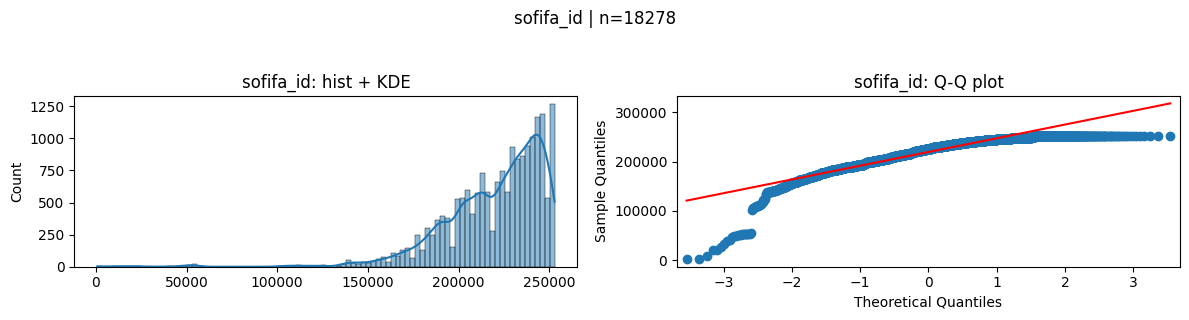

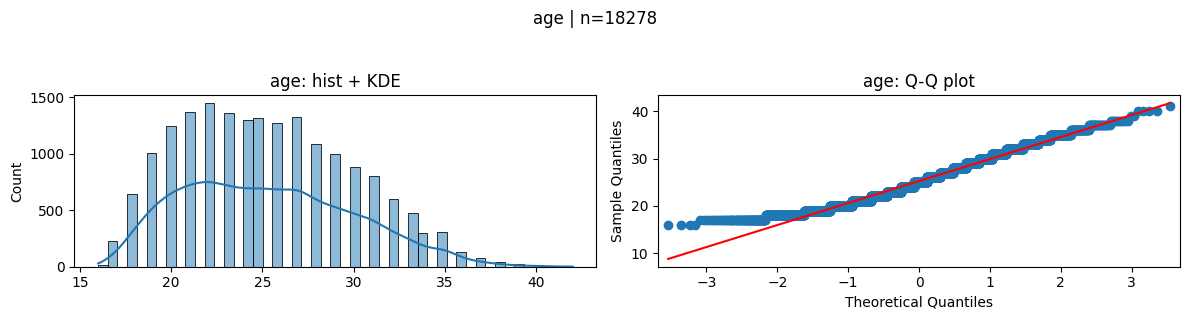

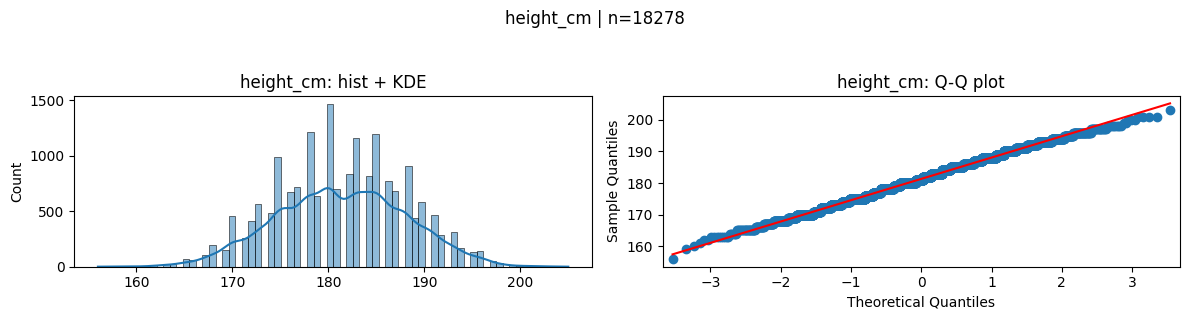

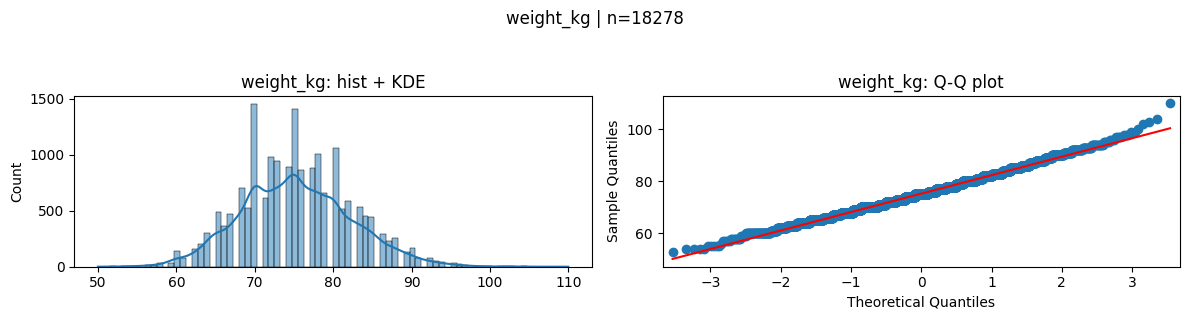

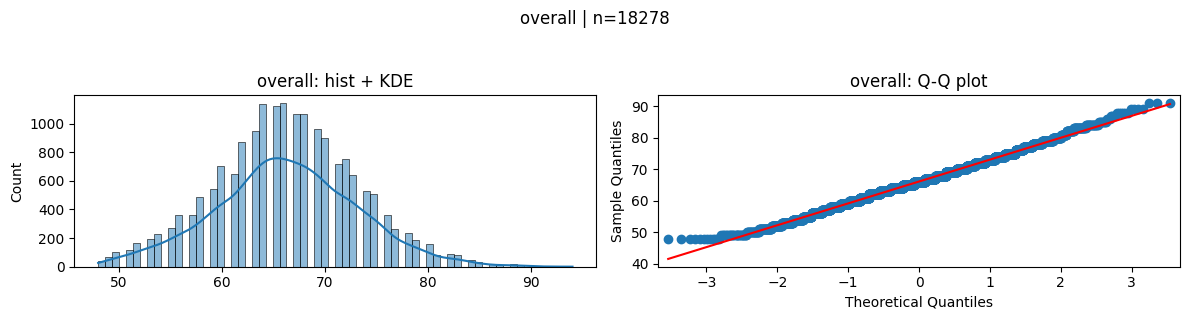

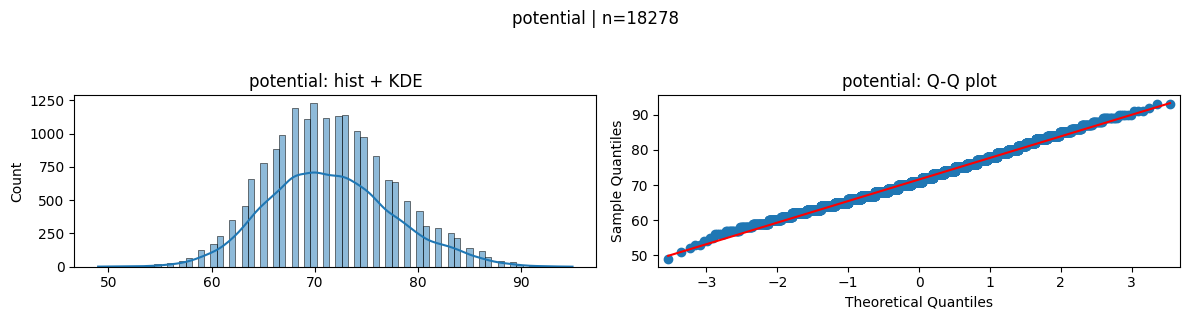

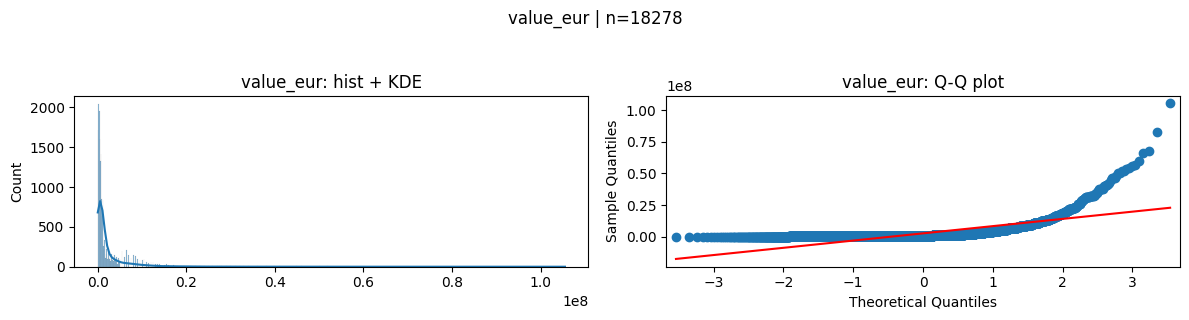

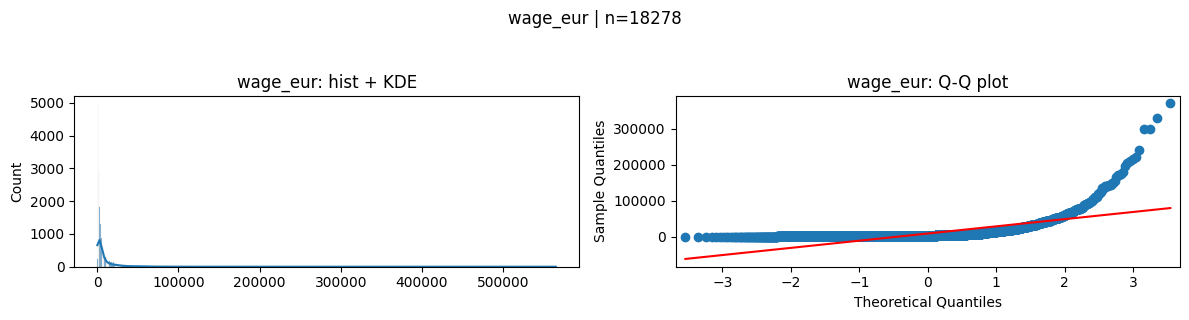

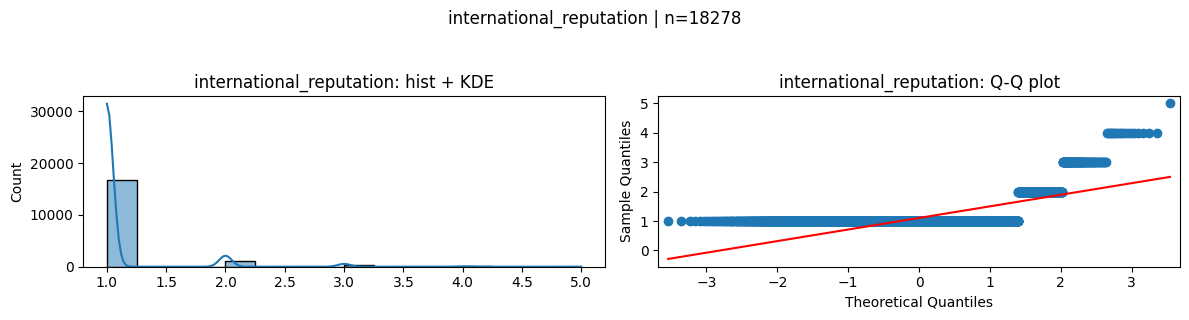

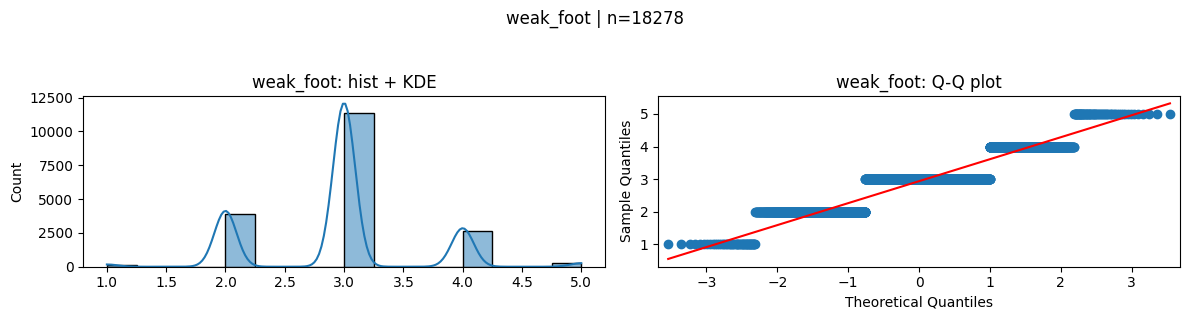

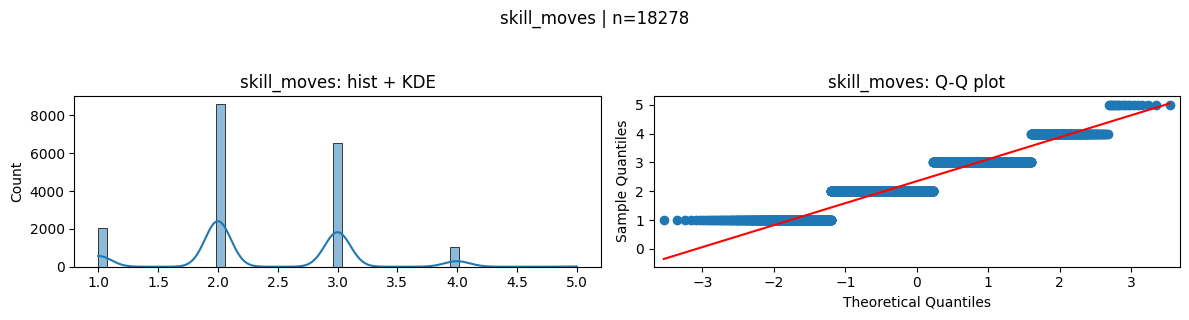

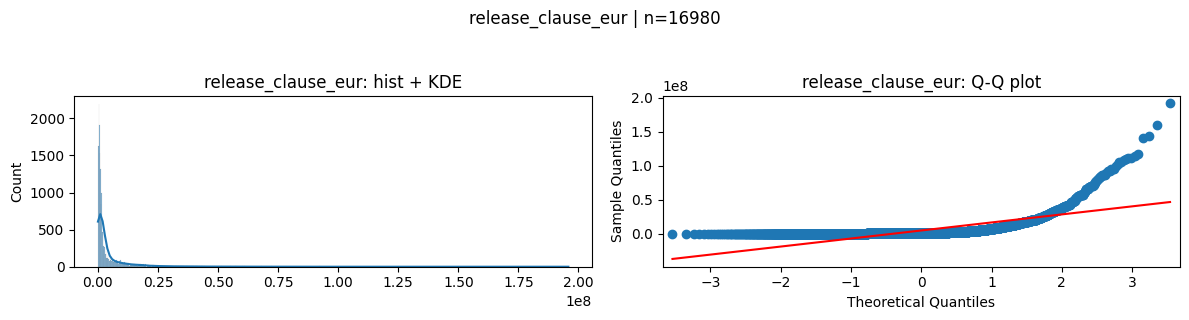

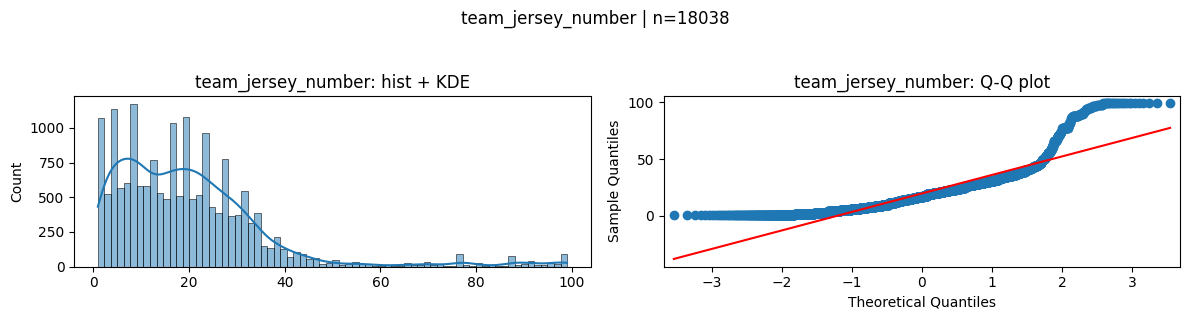

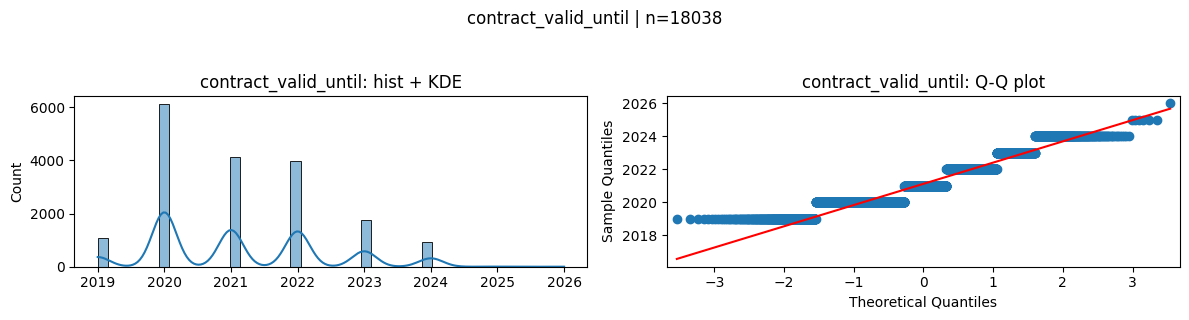

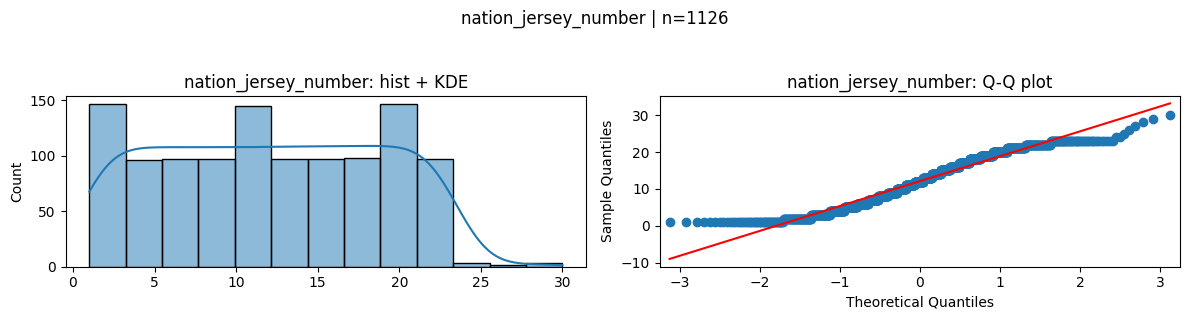

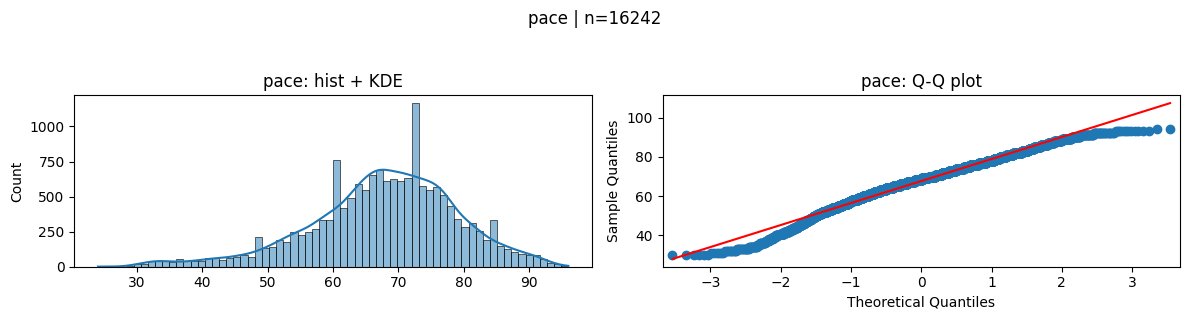

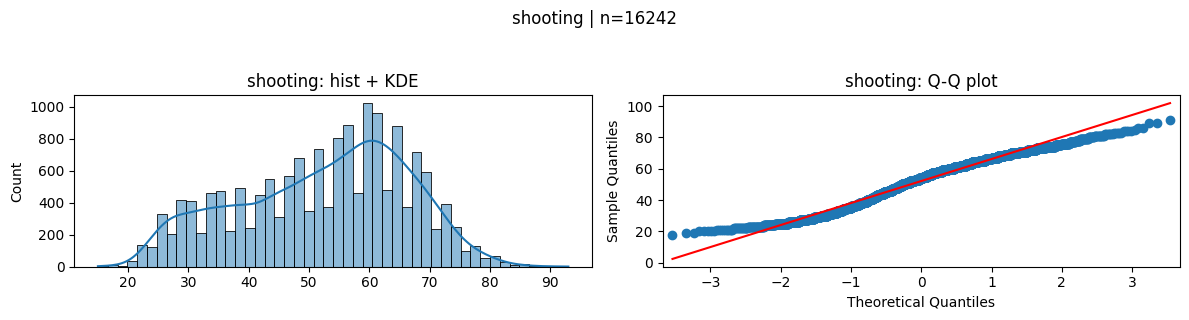

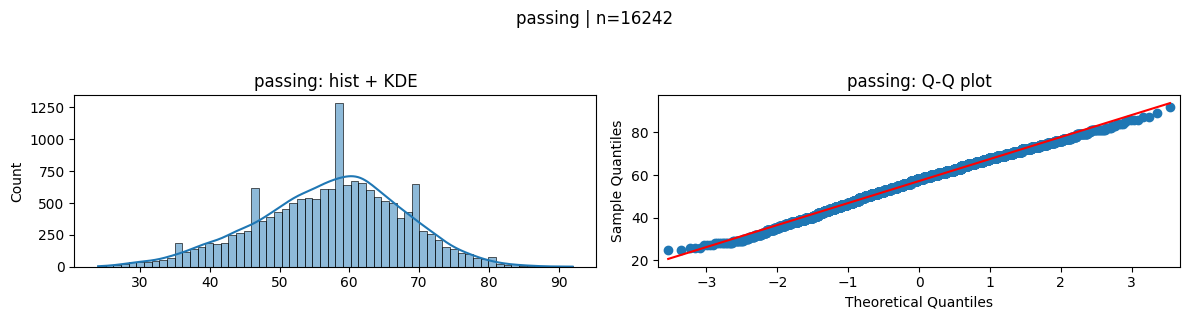

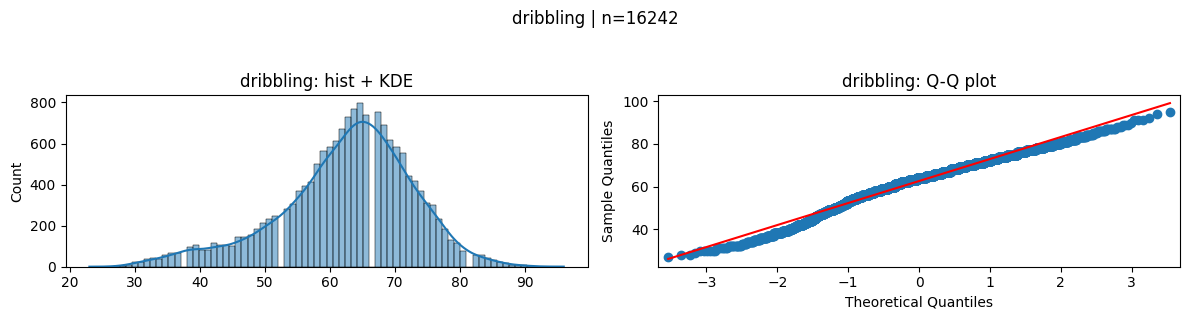

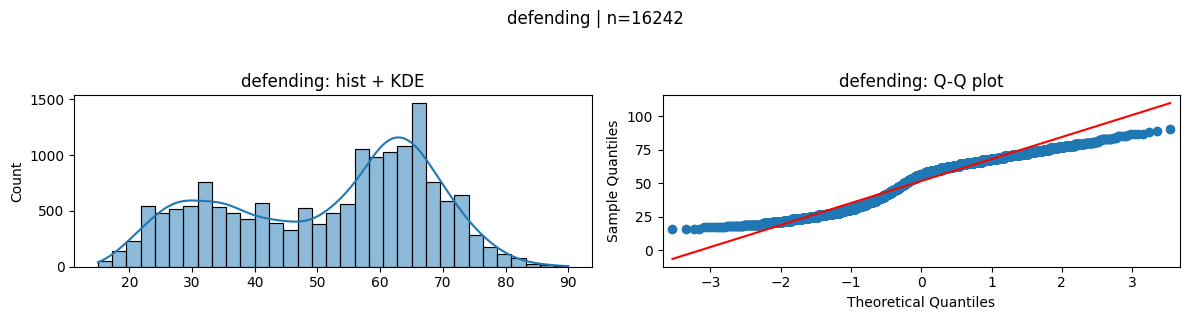

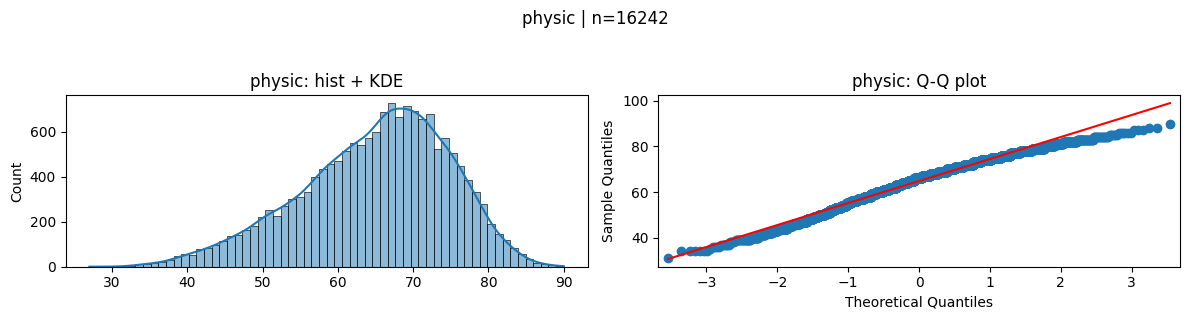

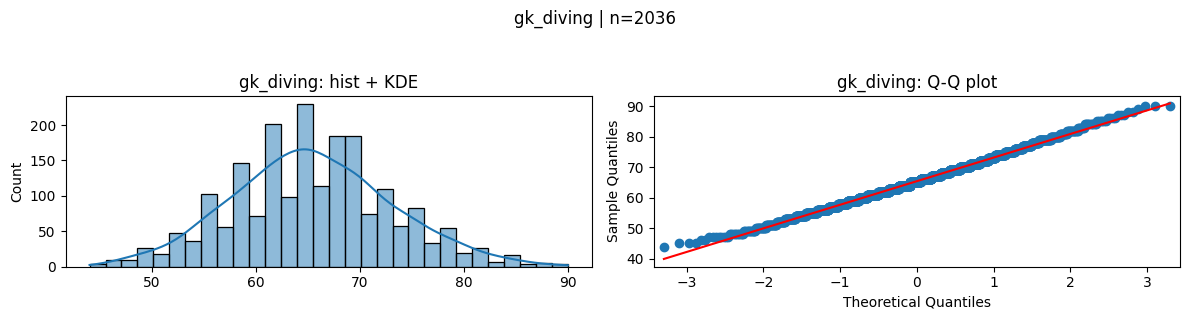

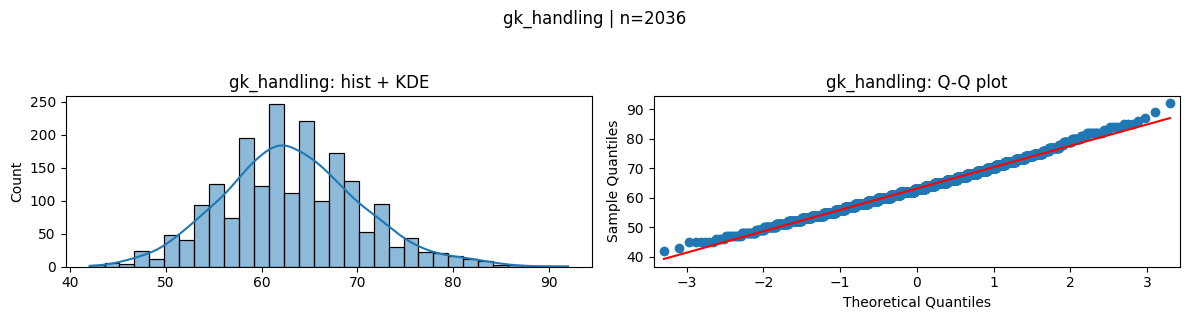

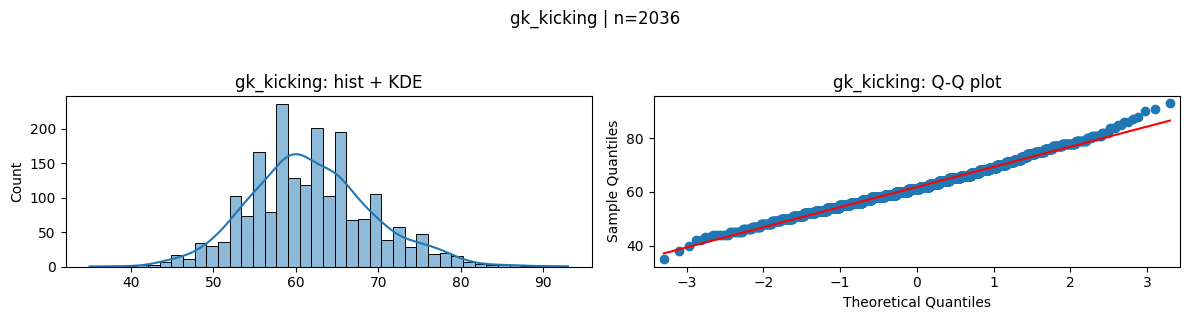

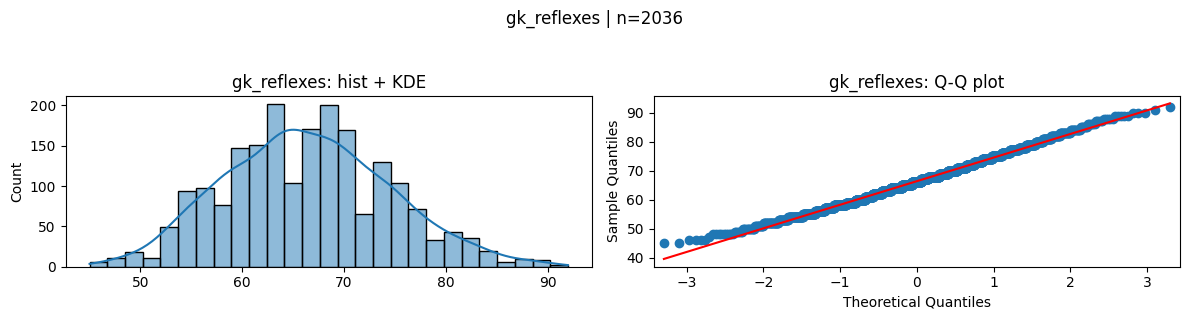

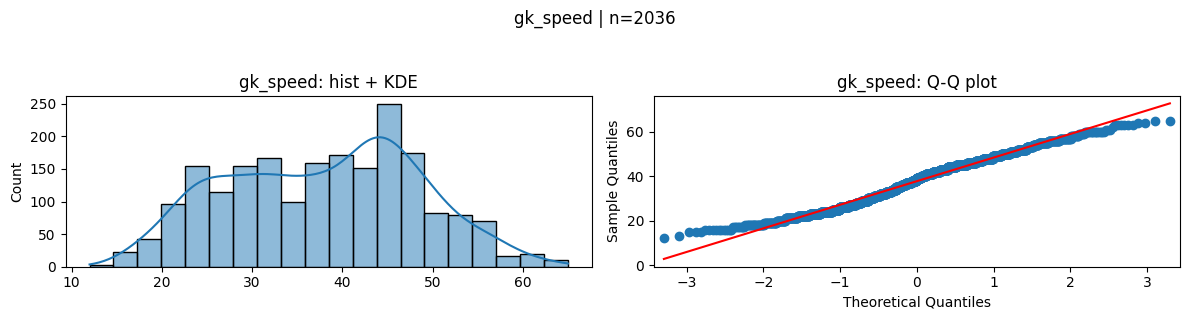

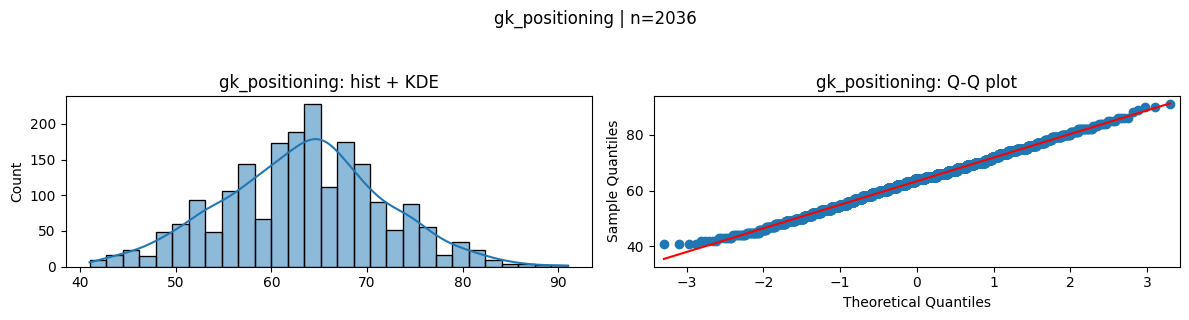

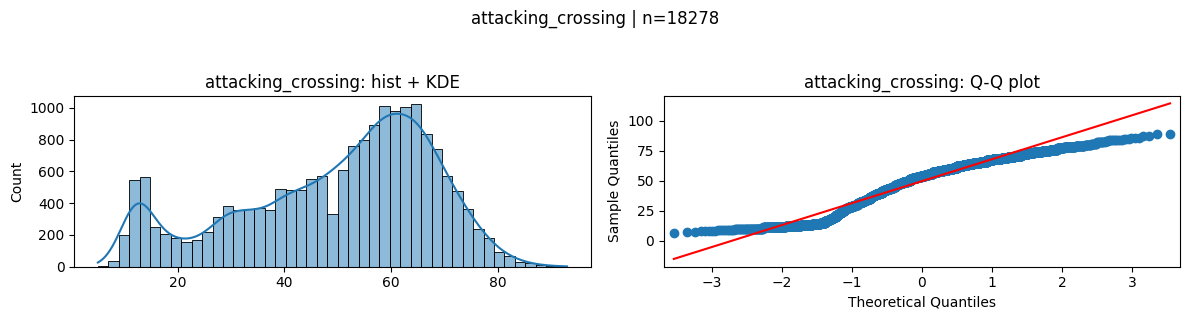

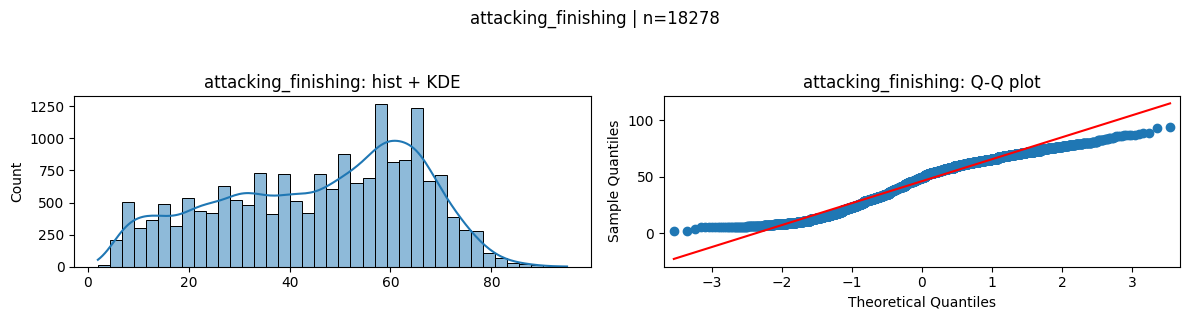

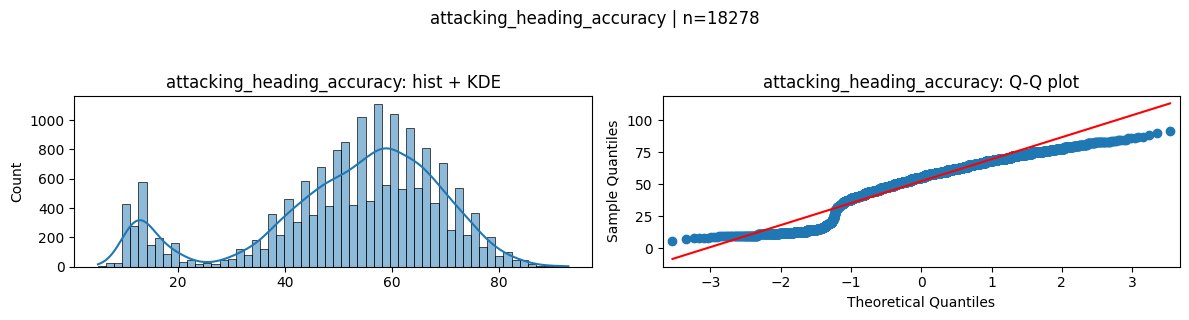

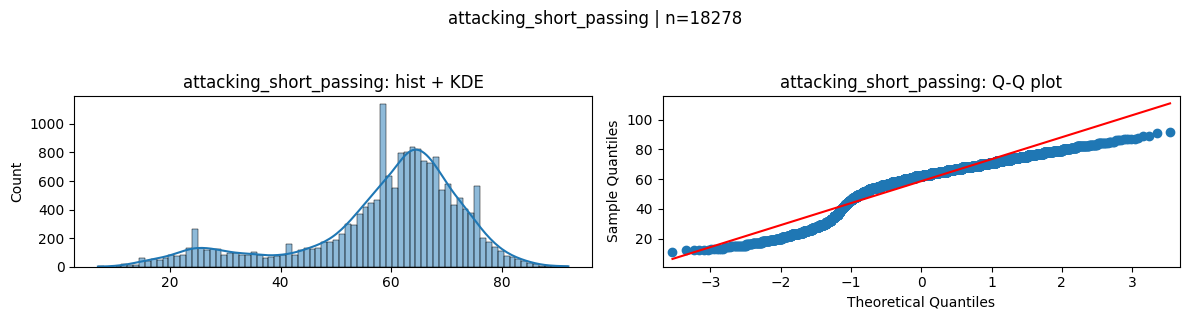

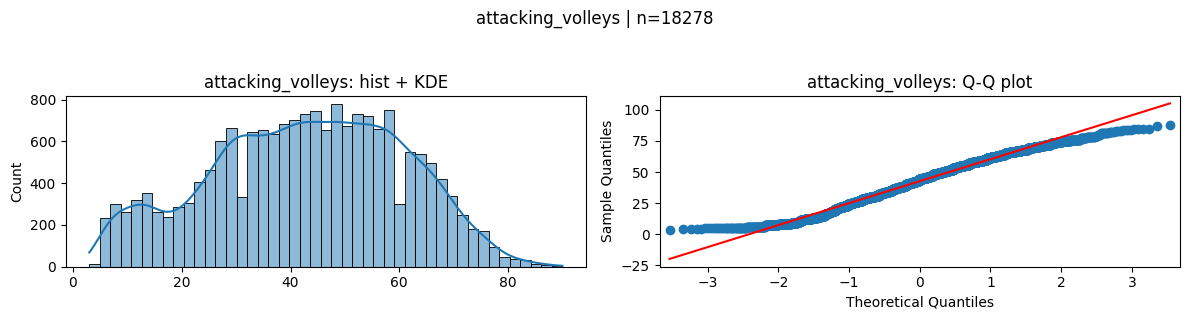

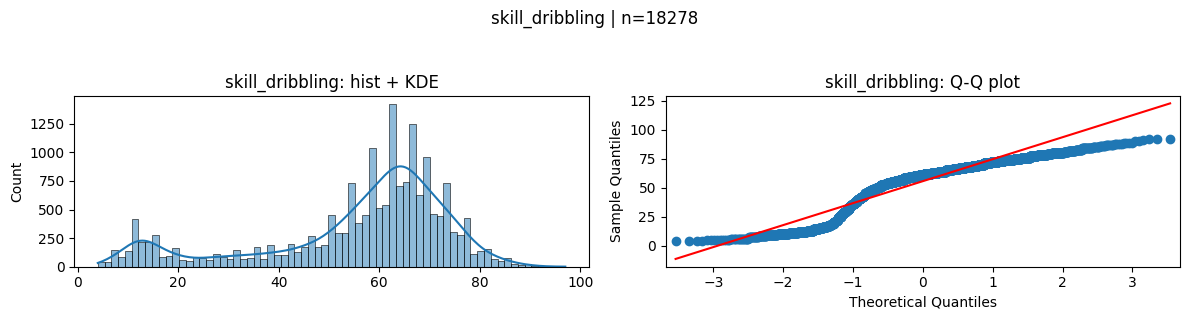

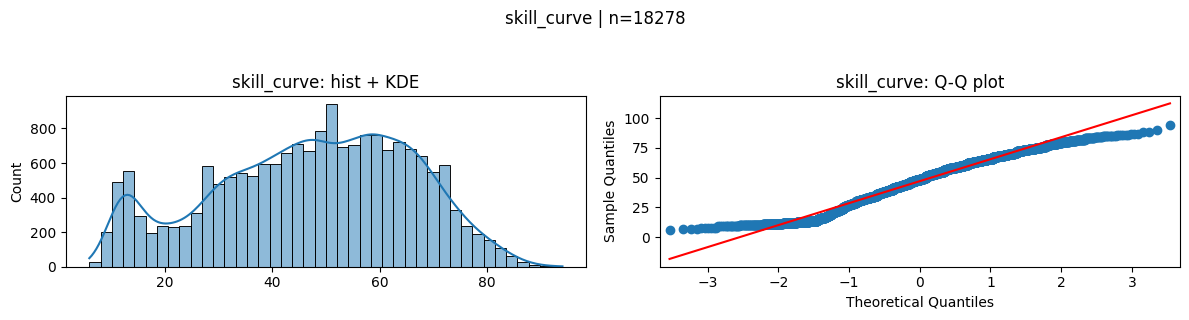

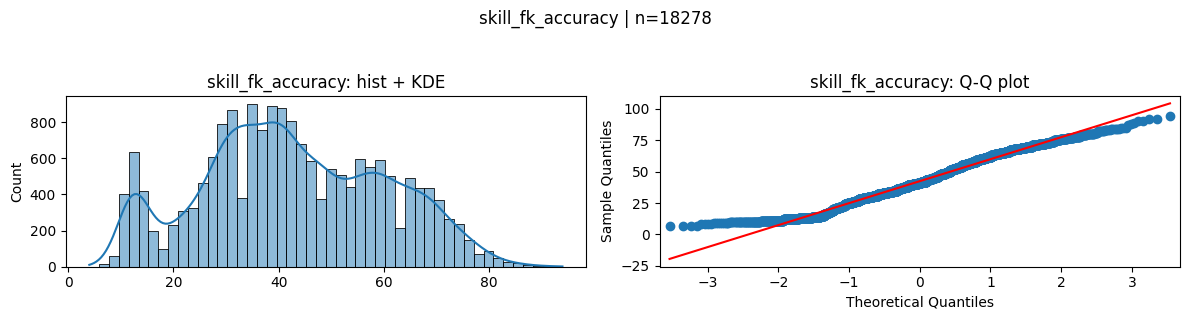

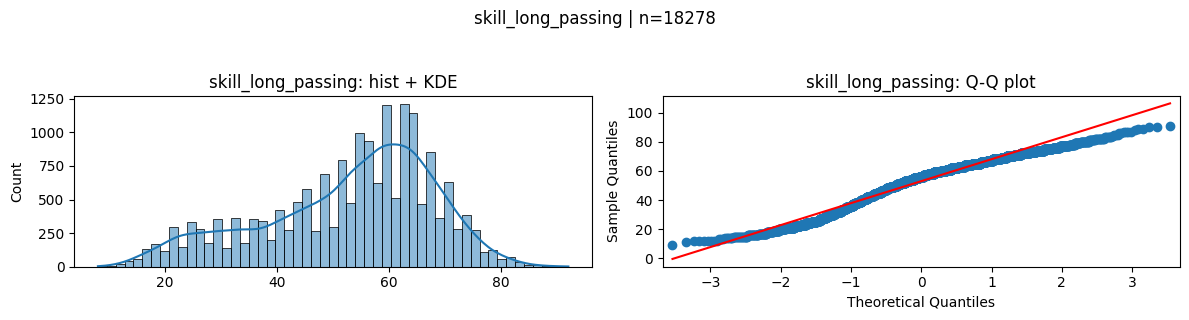

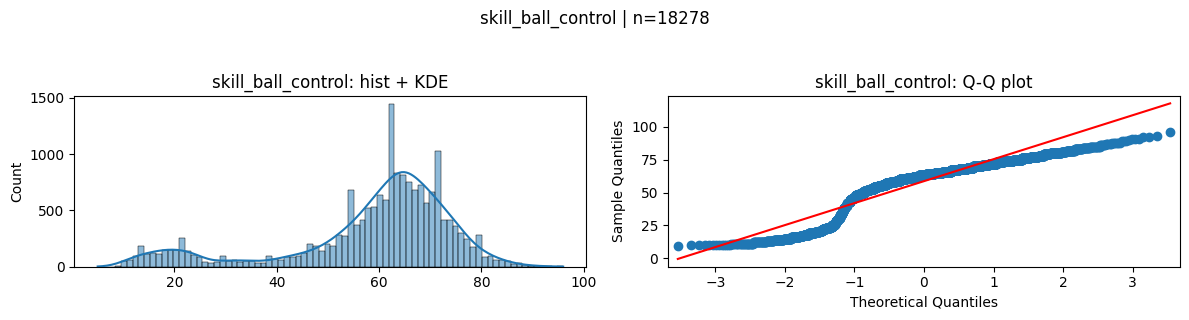

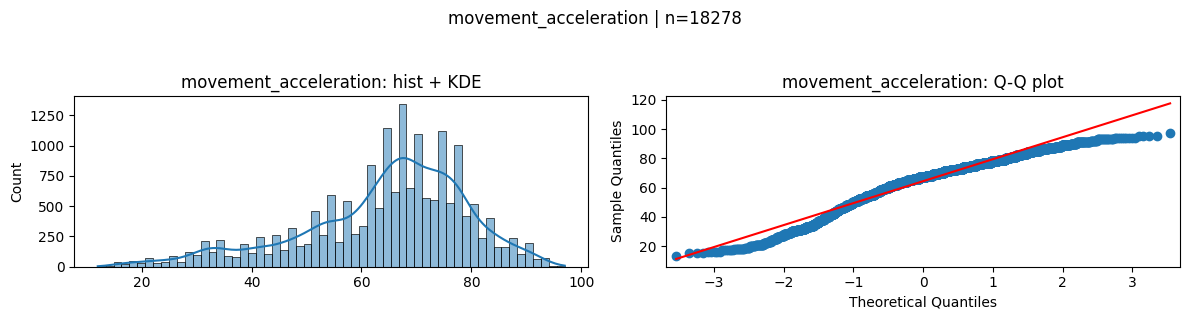

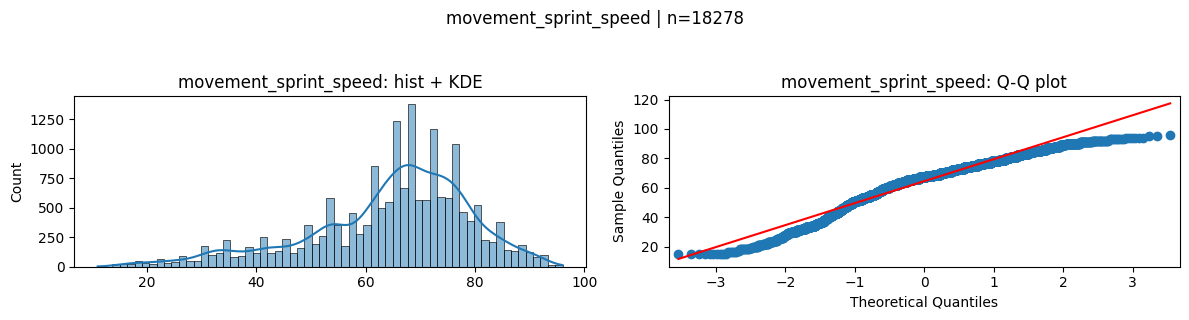

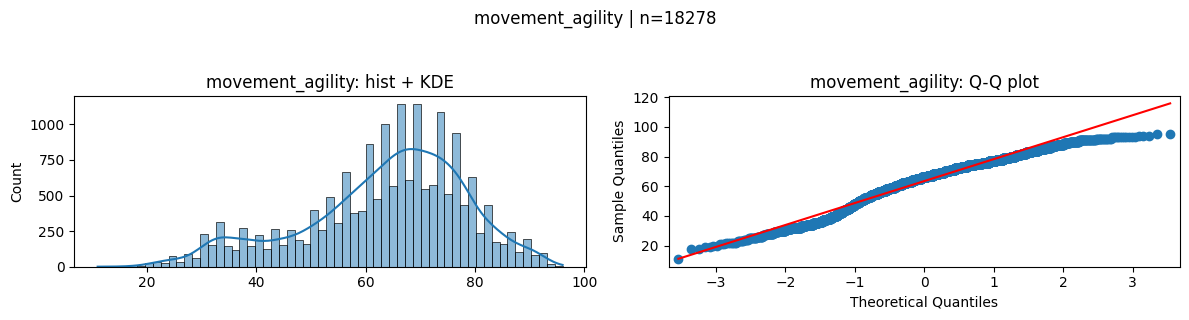

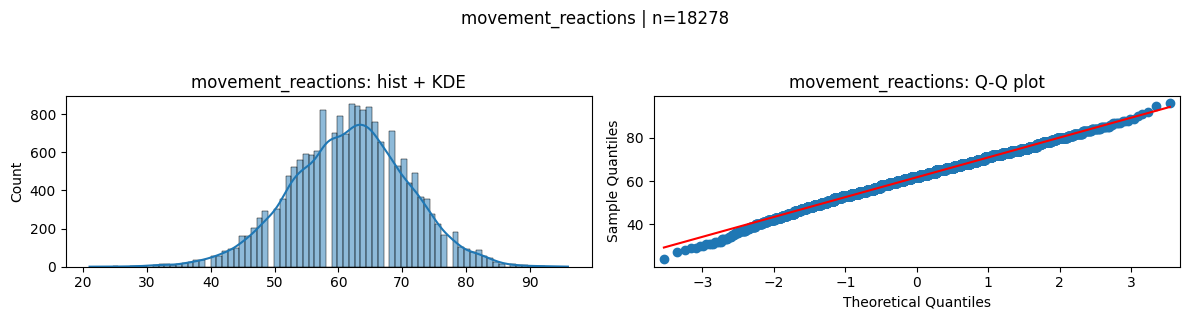

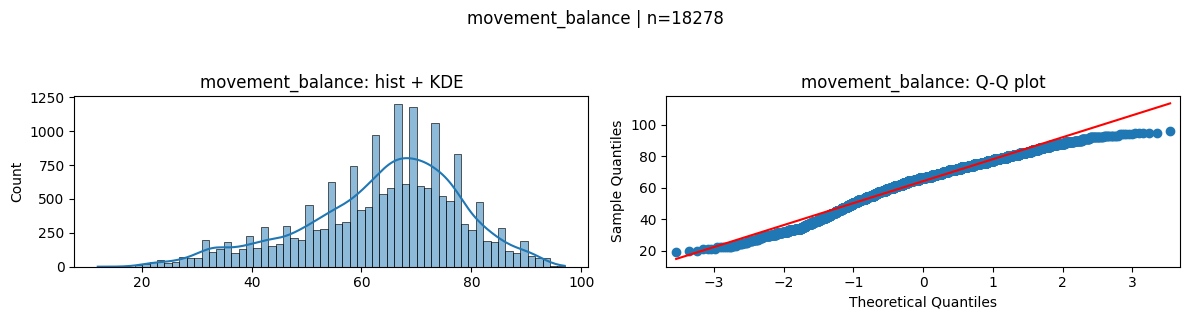

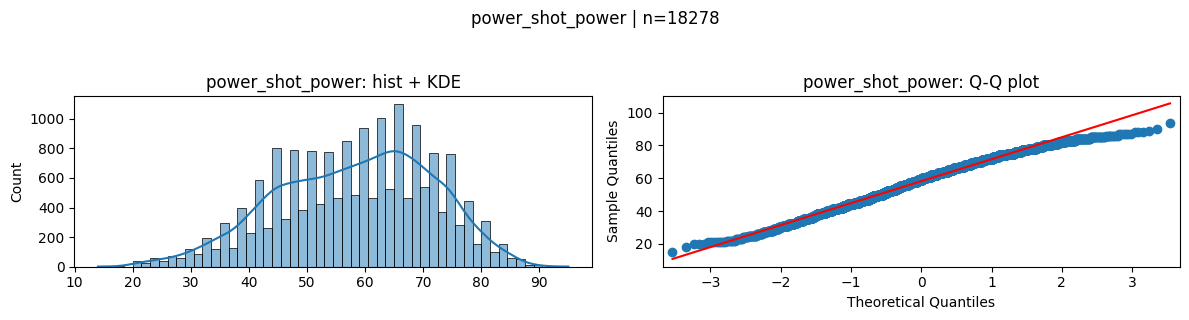

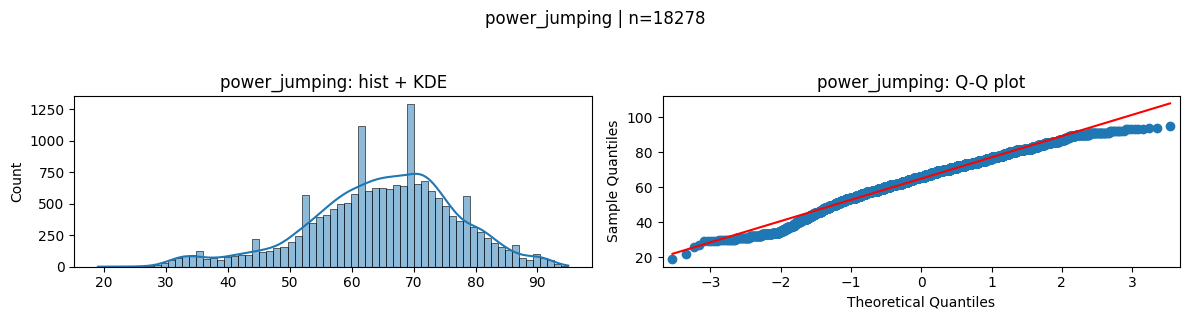

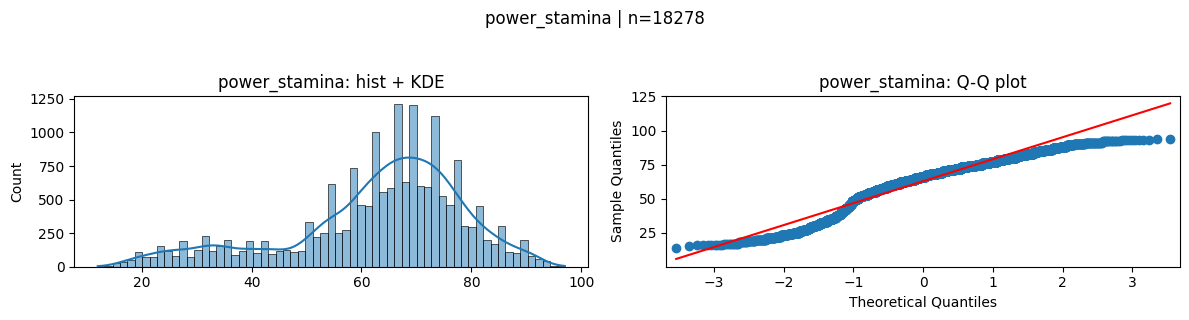

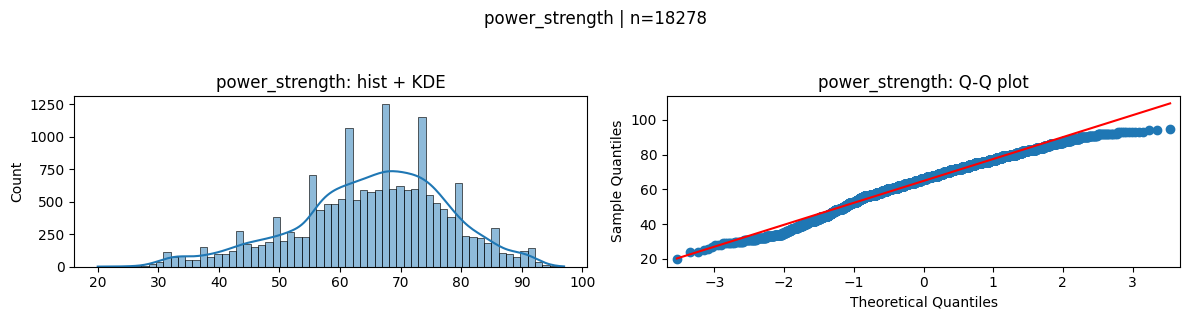

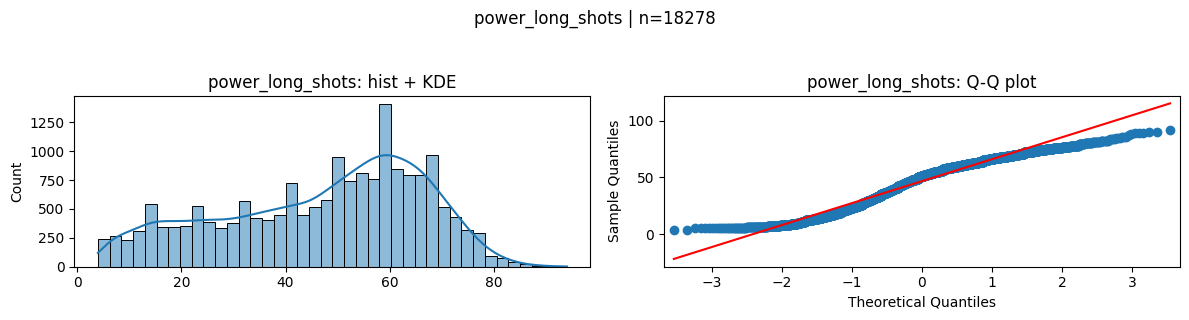

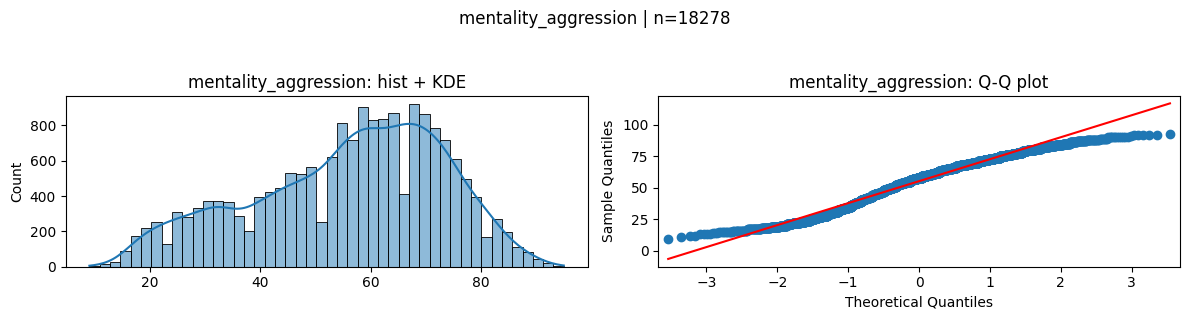

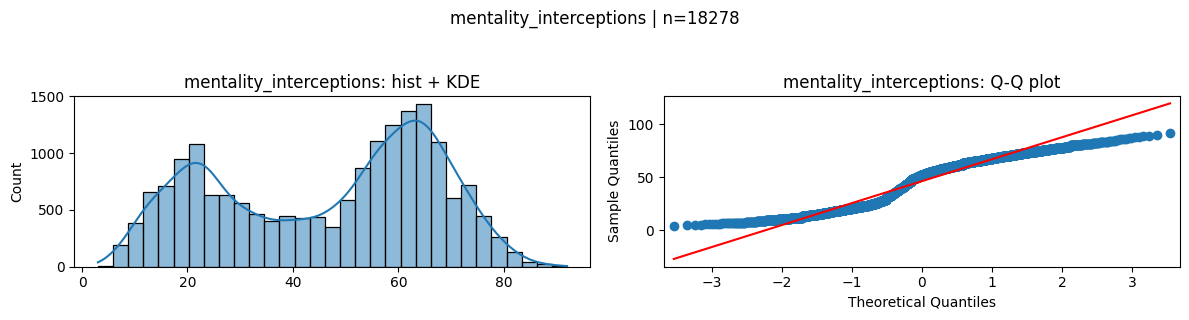

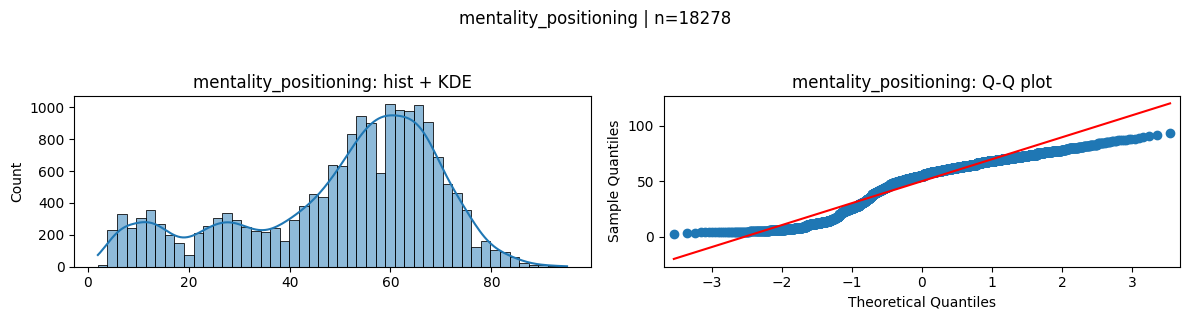

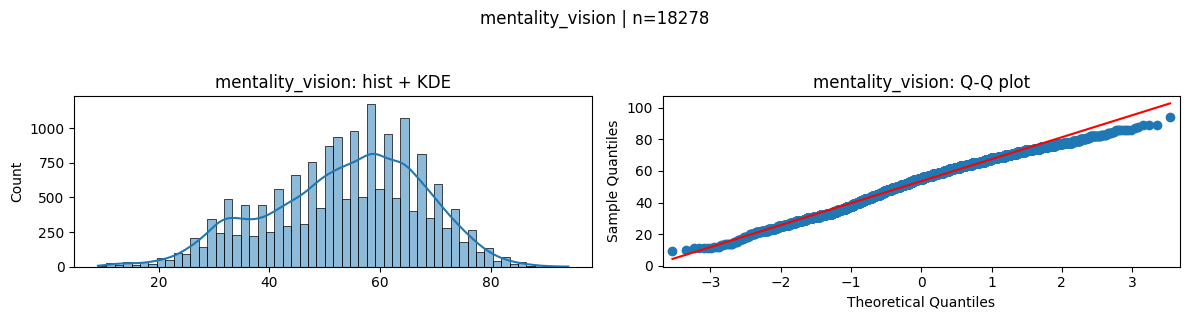

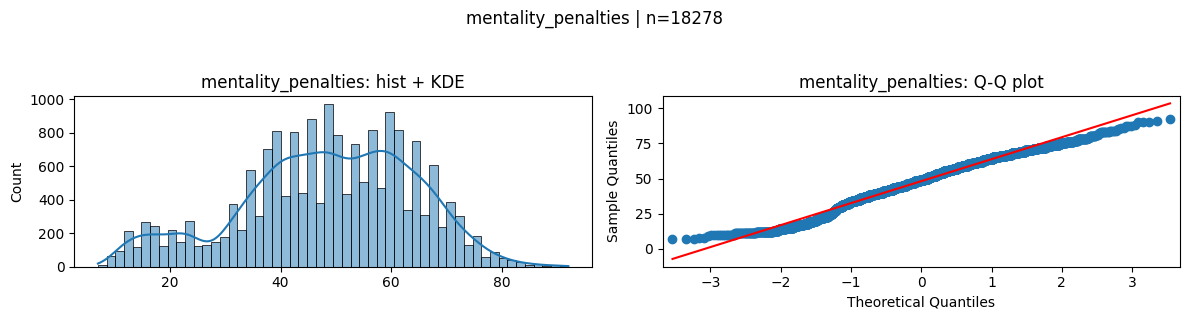

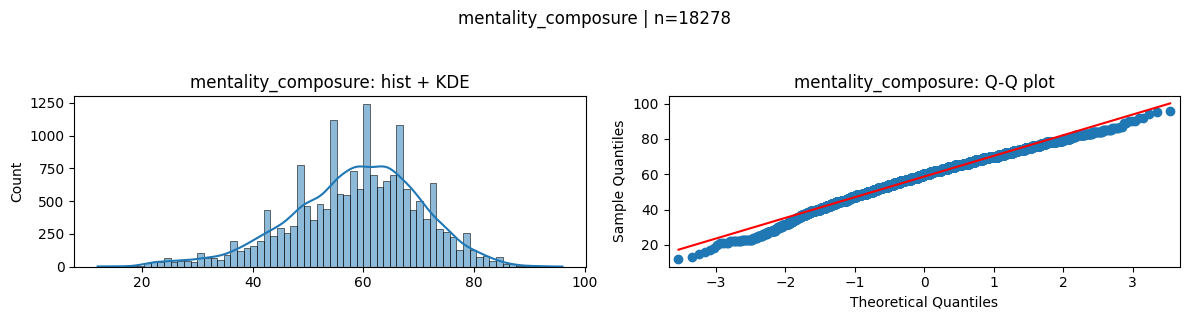

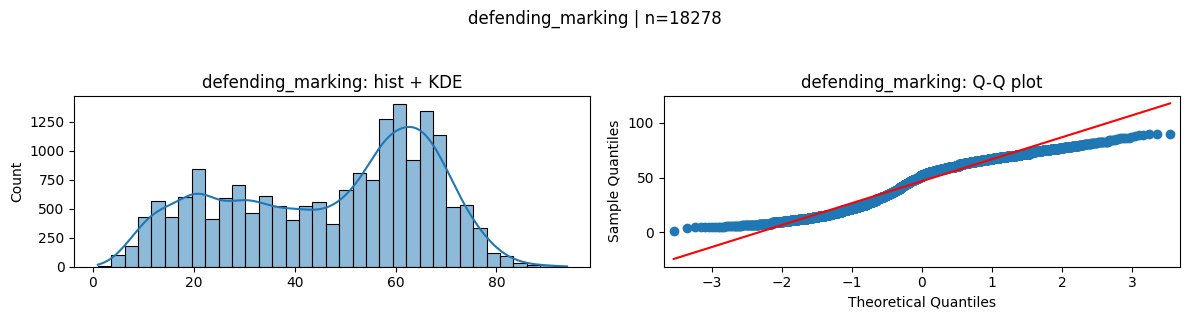

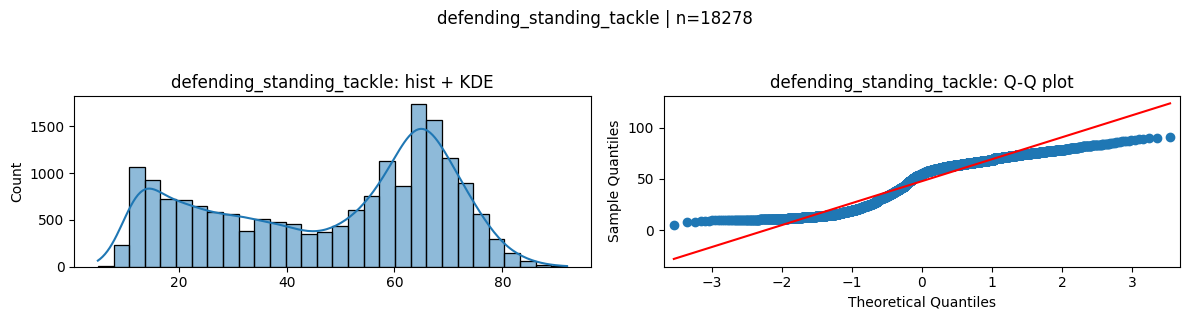

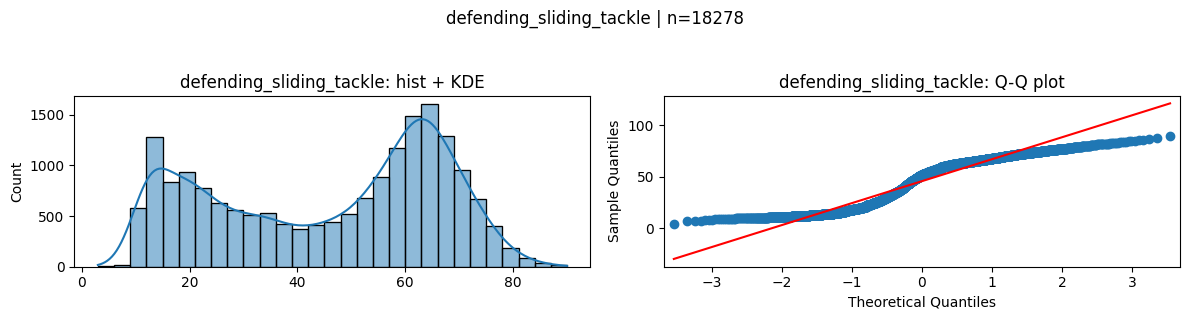

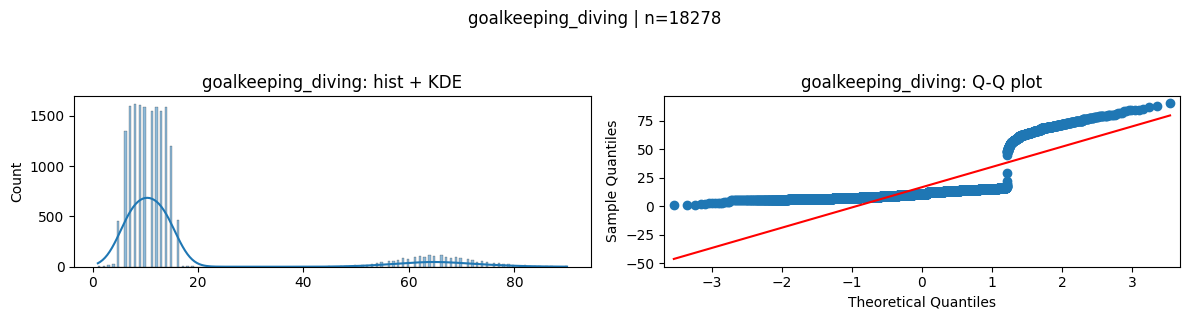

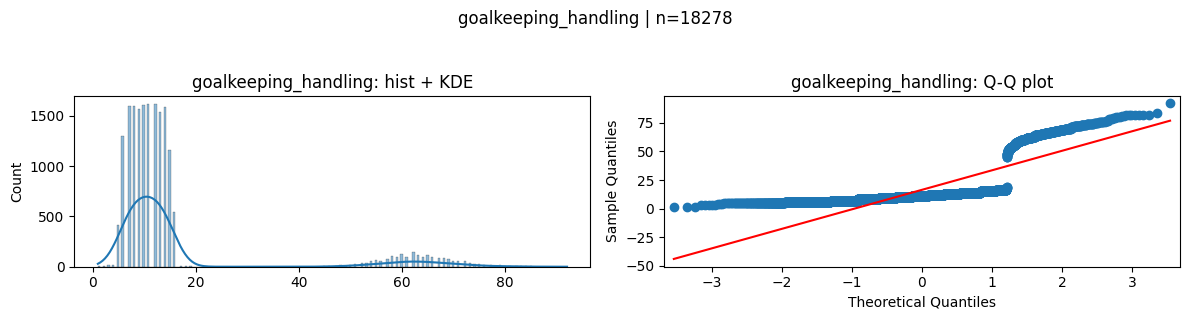

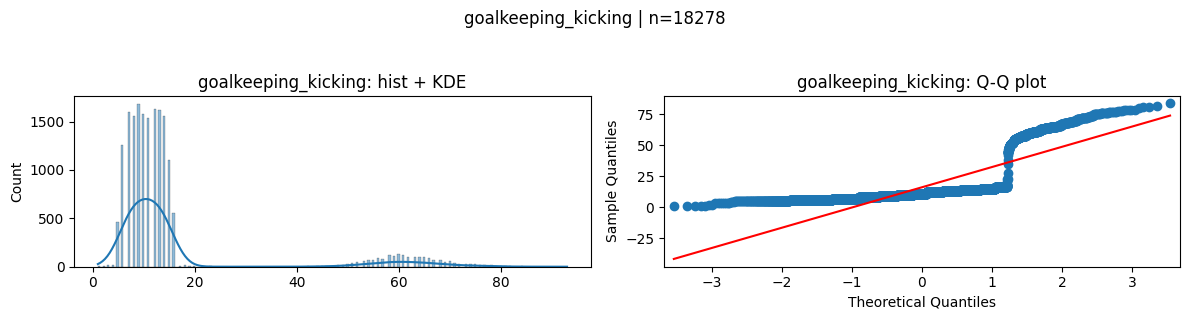

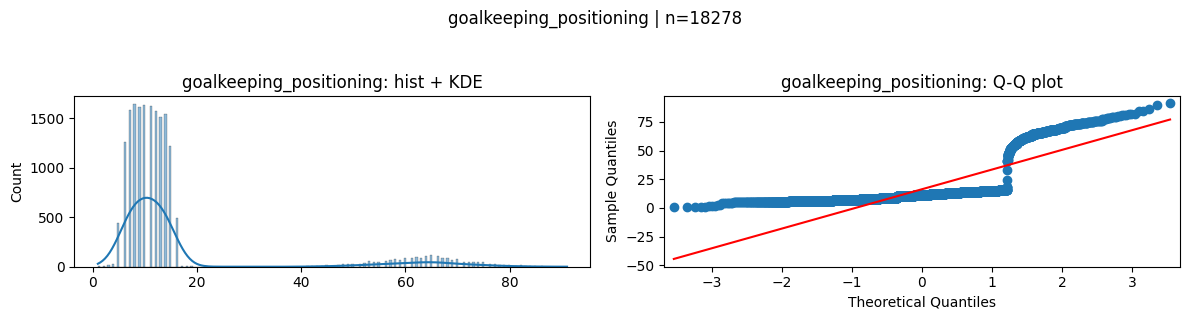

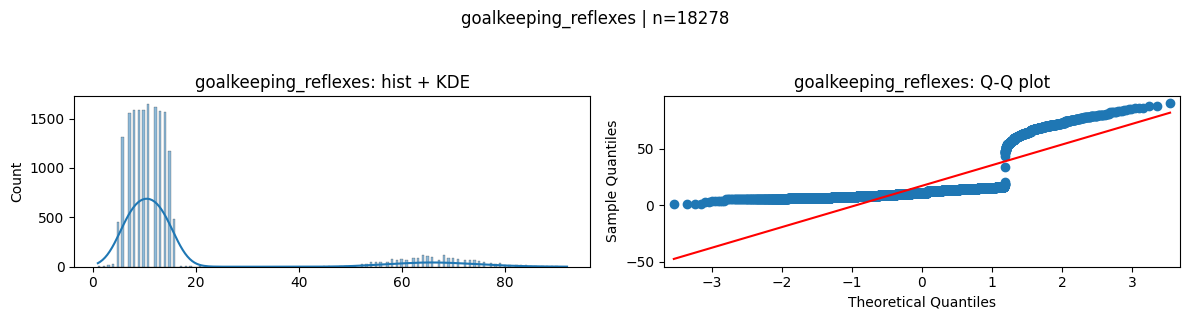

In [26]:
def analyze_distribution(series: pd.Series, name: str, max_n=5000):
    x = series.dropna().values
    if len(x) == 0:
        return

    if len(x) > max_n:
        x_test = np.random.choice(x, size=max_n, replace=False)
    else:
        x_test = x

    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    sns.histplot(x, kde=True, ax=axes[0])
    axes[0].set_title(f"{name}: hist + KDE")

    sm.qqplot(x_test, line="s", ax=axes[1])
    axes[1].set_title(f"{name}: Q-Q plot")

    fig.suptitle(f"{name} | n={len(x)}", y=1.05, fontsize=12)
    plt.tight_layout()
    plt.show()

num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    analyze_distribution(df[col], col)

По гистограммам и qq-графикам признаков можно подметить, что большинство признаков имеют нормальное или около нормального распрделение. Есть такие интересные признаки,которые связаны с характеристиками вратарей (голкиперов) , например: goalkeeper_reflexes. У их распредления, как будто, два графика (при этом нормально распределенных). Левый имеет большее кол-во наблюдений, однако меньших по значению. Связанно это с тем, что на самом деле это значение полевых игроков, которые не являются голкиперами, соответсвенно у них малые значения такой характрестики, однако их больше количественно относительно голкиперов в датасете.

## Аномальные значения

Как я упоминал ранее в предыдущей работе, в такой продуманной игре (FIFA 20) и от такого крупного разработчика (EA Sports), вряд ли должны быть выбросы в их данных. Однако в данной работе ранее мы уловили подозрительное значение, связанное с потенциалом и возрастом. Построим график зависимости overall и potential для игроков старше 39.

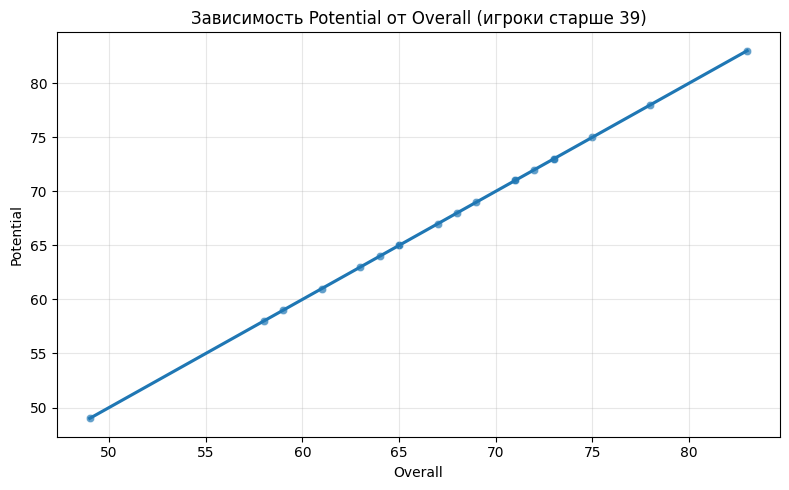

short_name  age  overall  potential
200        G. Buffon   41       83         83
868           Hilton   41       78         78
1880      C. Pizarro   40       75         75
2963     D. Dainelli   40       73         73
2965       Cifuentes   40       73         73
3706    C. Lucchetti   41       72         72
4417      N. Rimando   40       71         71
4418       T. Howard   40       71         71
6235       J. Gillet   40       69         69
7230   Lee Dong Gook   40       68         68
8359       F. Cubero   40       67         67
10665       F. Kippe   41       65         65
10702     M. Caranta   40       65         65
11832       C. Muñoz   42       64         64
13003   H. Sulaimani   42       63         63
14527      D. Bulman   40       61         61
15812      M. Gurski   40       59         59
16314     K. Ellison   40       58         58
18233      Zhou Ting   40       49         49

In [27]:
df_39 = df.loc[(df["age"] > 39), ["age", "overall", "potential"]].dropna()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_39, x="overall", y="potential", alpha=0.7)
sns.regplot(data=df_39, x="overall", y="potential", scatter=False)  # линия тренда
plt.title("Зависимость Potential от Overall (игроки старше 39)")
plt.xlabel("Overall")
plt.ylabel("Potential")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df[df['age'] > 39][['short_name', 'age', 'overall', 'potential']]

Мы получили линейный график. Как можно видеть это не выбросы, у данных игроков просто изначально достаточно высокий общий рейтинг (overall) и, так как, потенциал не может быть отрицательным относительно текущего рейтинга и игроков, чей возраст 41, мало, то и их средний потенциал получился высоким. Он по своей сути и отражает средний рейтинг данных игроков.

В предыдущей и текущей работе выбросов мне не удалось обнаружить, но были обнаруженые "странные" значения в признаке body_type.

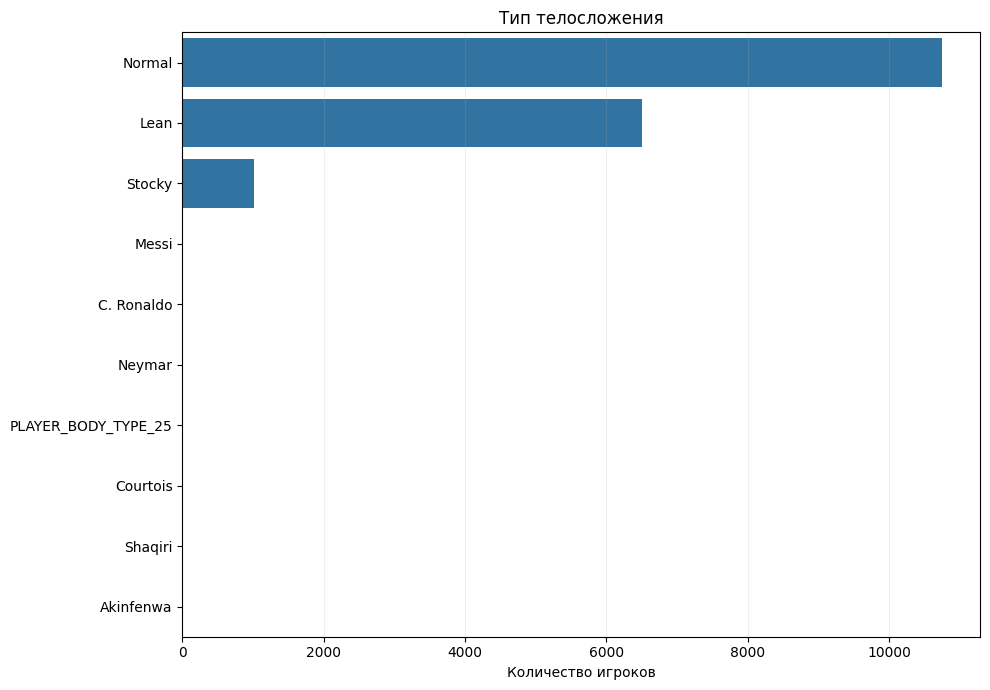

In [28]:
vc = df["body_type"].value_counts(dropna=True)

top_k = 25
top = vc.head(top_k)
other = vc.iloc[top_k:].sum()
if other > 0:
    top.loc["Other"] = other

plt.figure(figsize=(10, 7))
sns.barplot(x=top.values, y=top.index.astype(str))
plt.title("Тип телосложения")
plt.xlabel("Количество игроков")
plt.ylabel("")
plt.grid(True, axis="x", alpha=0.2)
plt.tight_layout()
plt.show()

Наблюдаются странные значения, такие как Messi, C.Ronaldo, Neymar, PLAYER_BODY_TYPE_25 и т.д.

## Пропуски в данных

<Axes: title={'center': 'Распределение пропусков в данных'}>

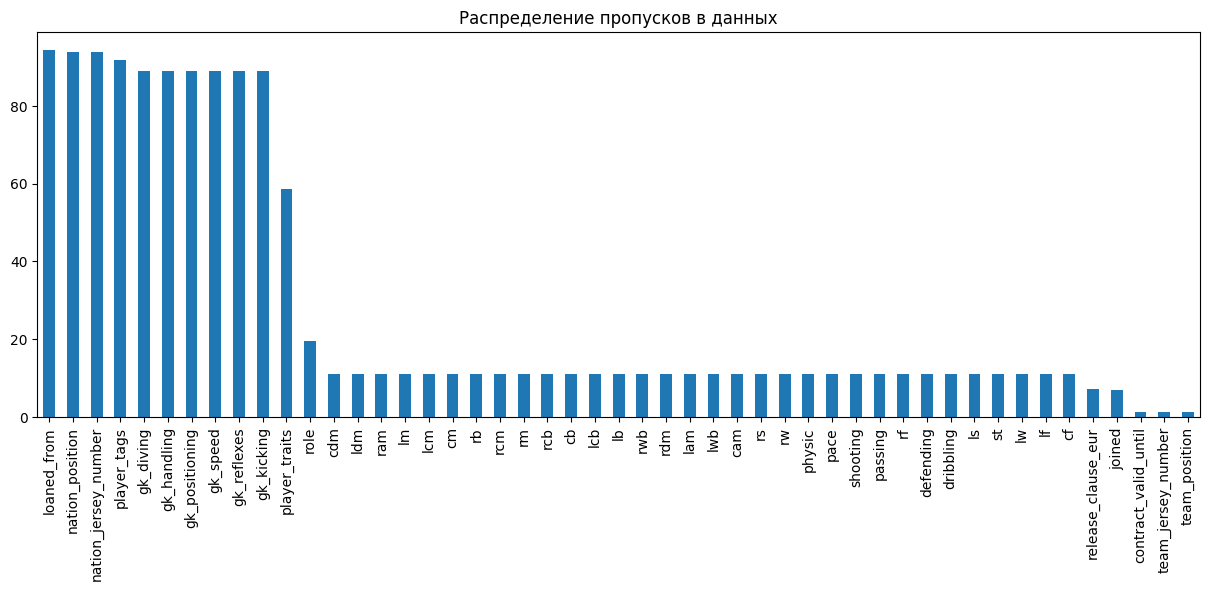

In [29]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

cols_with_null.plot(
    kind='bar',
    figsize=(15, 5),
    title='Распределение пропусков в данных'
)

Проанализируем пропуски на нескольких признаках. loaned_from - арендован из, указывает с какого клуба арендован игрок, в противном случае пропуск (игрок принадлежит текущему клубу), так как большинство игроков не арендованные, то и данный признак имеет большое кол-во пропусков. gk_* - это различные характрестики голкиперов (вратари), так как большинство игроков полевые, то и данные признаки имет пустые значения. nation_jersey_number и nation_position - номер футболки в сборной и позиция игрока в сборной соответтсвенно. Сборные имеют огрнаиченное количество игроков, соотвественно большинство игроков туда не попадают, так как отбираются лучшие игроки своей страны, следавтельно данные признаки пустые для игрков, не попавших в свою сборную. Можно с уверенностью сказать, что пропуски обусловленны своими причинами. 

# Регрессионный анализ

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Линейная регрессия: *overall* - целевая, *passing* - заивсимая.

In [37]:
tmp = df[["overall", "passing"]].copy()
tmp["overall"] = pd.to_numeric(tmp["overall"], errors="coerce")
tmp["passing"] = pd.to_numeric(tmp["passing"], errors="coerce")
tmp = tmp.dropna()

X = tmp[["passing"]]
y = tmp["overall"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Модель
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Метрики
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

metrics = {
    "R2_train": r2_score(y_train, y_pred_train),
    "R2_test": r2_score(y_test, y_pred_test),
    "MAE_test": mean_absolute_error(y_test, y_pred_test),
    "RMSE_test": rmse(y_test, y_pred_test),
    "coef": lr.coef_[0],
    "intercept": lr.intercept_
}

print("Линейная регрессия: overall = coef*passing + intercept")
for k, v in metrics.items():
    print(f"{k:>10}: {v:.4f}" if isinstance(v, float) else f"{k:>10}: {v}")


Линейная регрессия: overall = coef*passing + intercept
  R2_train: 0.4659
   R2_test: 0.4754
  MAE_test: 3.8745
 RMSE_test: 4.9496
      coef: 0.4489
 intercept: 40.7451


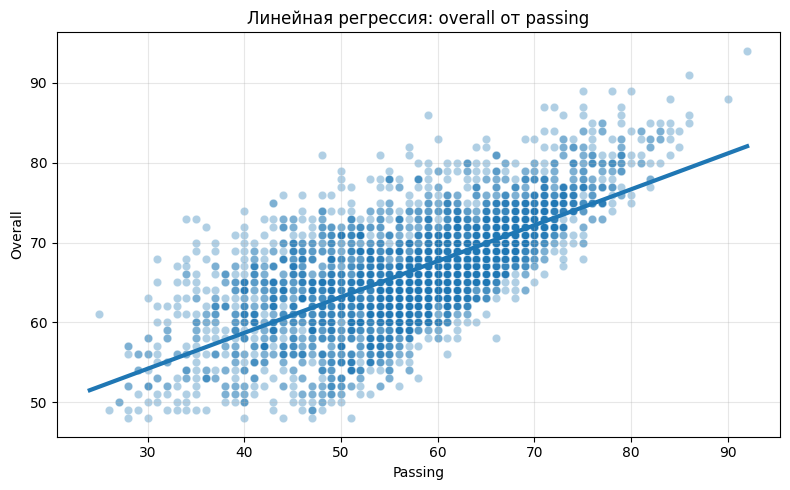

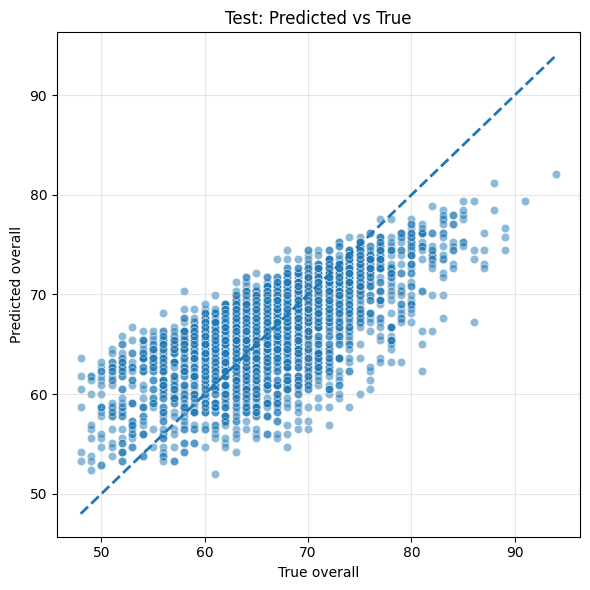

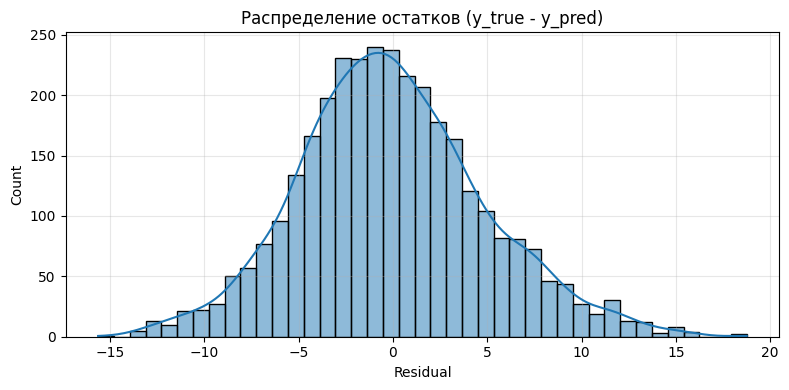

In [32]:
# Визуализация результата регрессии (scatter + линия)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tmp.sample(min(len(tmp), 4000), random_state=42), x="passing", y="overall", alpha=0.35)

x_line = np.linspace(tmp["passing"].min(), tmp["passing"].max(), 200)
y_line = lr.predict(pd.DataFrame({"passing": x_line}))
plt.plot(x_line, y_line, linewidth=3)

plt.title("Линейная регрессия: overall от passing")
plt.xlabel("Passing")
plt.ylabel("Overall")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#  predicted vs true (на test)
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, linestyle="--", linewidth=2)  # идеальная линия y=x
plt.title("Test: Predicted vs True")
plt.xlabel("True overall")
plt.ylabel("Predicted overall")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred_test

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков (y_true - y_pred)")
plt.xlabel("Residual")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Мы получили очень неплохой результат, учитывая что предсказываем целевую переменную с помощью одной зависимой переменной. Метрики нам говорят, что в среднем модель ошибается на 4 пунткта, а иногда (из-за выбросов/крайних случаев) ошибки ближе к 5 (MAE_test: 3.8745 RMSE_test: 4.9496). passing объясняет только около 47–48% вариации overall (R2_test: 0.4754). То есть связь заметная, но одного признака недостаточно, чтобы точно предсказывать общий рейтинг.

### Выбросы

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [38]:
tmp = df[["overall", "passing"]].copy()
tmp["overall"] = pd.to_numeric(tmp["overall"], errors="coerce")
tmp["passing"] = pd.to_numeric(tmp["passing"], errors="coerce")
tmp = tmp.dropna().reset_index(drop=False).rename(columns={"index": "row_id"})

X = sm.add_constant(tmp["passing"])
y = tmp["overall"]

model = sm.OLS(y, X).fit()
infl = OLSInfluence(model)

# Метрики влияния 
tmp["fitted"] = model.fittedvalues
tmp["resid"] = model.resid

tmp["leverage"] = infl.hat_matrix_diag                       
tmp["stud_resid"] = infl.resid_studentized_external          
tmp["cooks_d"] = infl.cooks_distance[0]                      
tmp["dffits"] = infl.dffits[0]                               

n = len(tmp)
p = int(model.df_model) + 1 

# Пороговые значения
lev_thr = 2 * p / n
stud_thr = 3
cooks_thr = 4 / n
dffits_thr = 2 * np.sqrt(p / n)

tmp["is_outlier"] = tmp["stud_resid"].abs() > stud_thr
tmp["is_high_leverage"] = tmp["leverage"] > lev_thr
tmp["is_influential"] = (tmp["cooks_d"] > cooks_thr) | (tmp["dffits"].abs() > dffits_thr)


cols_show = ["row_id", "overall", "passing", "stud_resid", "leverage", "cooks_d", "dffits",
             "is_outlier", "is_high_leverage", "is_influential"]

top_infl = tmp.sort_values(["cooks_d", "leverage", "stud_resid"], ascending=False).head(15)[cols_show]
display(top_infl)

print("Кол-во выбросов:", int(tmp["is_outlier"].sum()))
print("Кол-во наблюдений с высокой степенью напряженности:", int(tmp["is_high_leverage"].sum()))
print("Кол-во влиятельных наблюдений:", int(tmp["is_influential"].sum()))

row_id  overall  passing  stud_resid  leverage   cooks_d    dffits  \
75        90       85     42.0    5.097434  0.000193  0.002510  0.070911   
0          0       94     92.0    2.393396  0.000749  0.002145  0.065509   
2715    3013       73     34.0    3.411428  0.000368  0.002143  0.065491   
1045    1169       77     38.0    3.852859  0.000272  0.002017  0.063534   
1          1       93     82.0    3.094041  0.000410  0.001963  0.062679   
2876    3189       73     35.0    3.321200  0.000343  0.001889  0.061481   
2004    2219       74     36.0    3.431542  0.000318  0.001871  0.061189   
2          2       92     87.0    2.442940  0.000565  0.001687  0.058095   
3936    4330       71     34.0    3.010325  0.000368  0.001669  0.057790   
3338    3685       72     35.0    3.120650  0.000343  0.001668  0.057768   
6107    6725       68     31.0    2.679381  0.000453  0.001625  0.057025   
3011    3331       72     36.0    3.030444  0.000318  0.001459  0.054037   
3          4       91     86.0    2.332562  0.000532  0.001447  0.053812   
6001    6608       69     33.0    2.699497  0.000395  0.001441  0.053688   
7446    8192       67     31.0    2.478888  0.000453  0.001391  0.052758   

      is_outlier  is_high_leverage  is_influential  
75          True             False            True  
0          False              True            True  
2715        True              True            True  
1045        True              True            True  
1           True              True            True  
2876        True              True            True  
2004        True              True            True  
2          False              True            True  
3936        True              True            True  
3338        True              True            True  
6107       False              True            True  
3011        True              True            True  
3          False              True            True  
6001       False              True            True  
7446       False              True            True

Кол-во выбросов: 72
Кол-во наблюдений с высокой степенью напряженности: 1410
Кол-во влиятельных наблюдений: 942


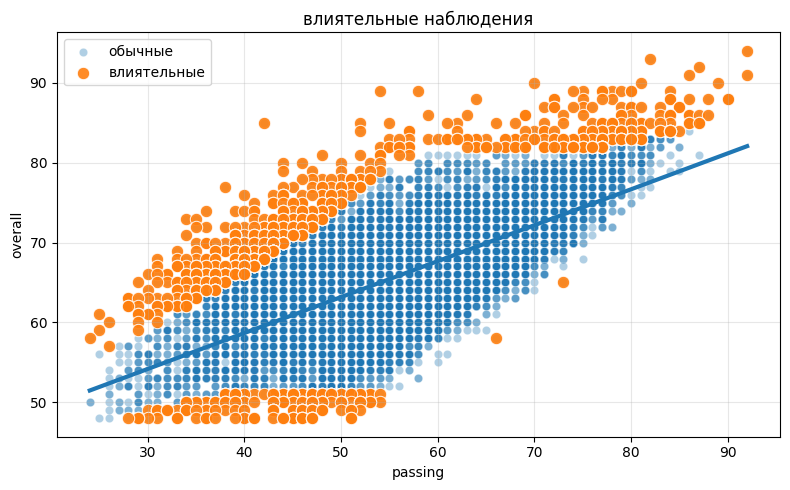

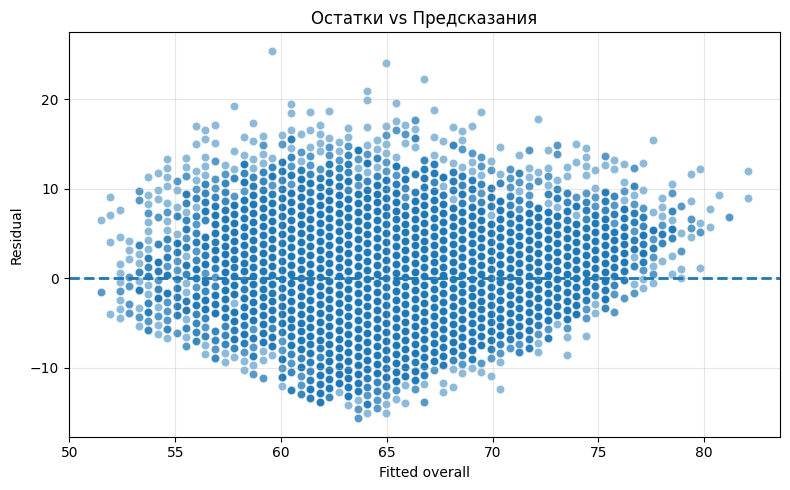

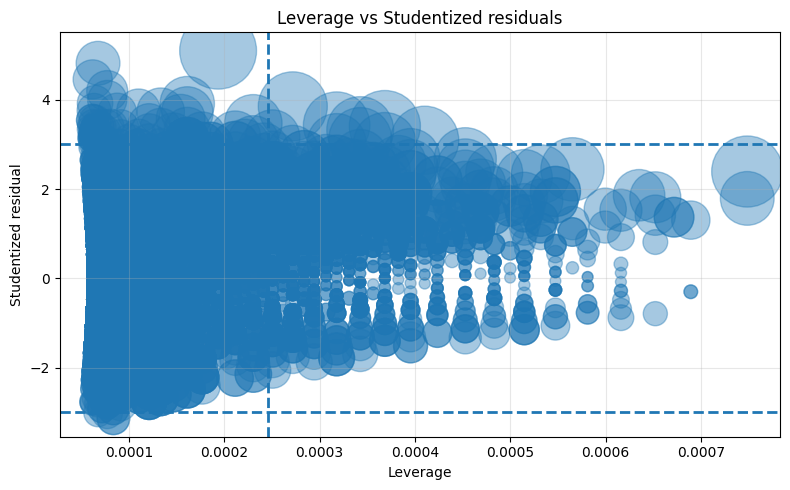

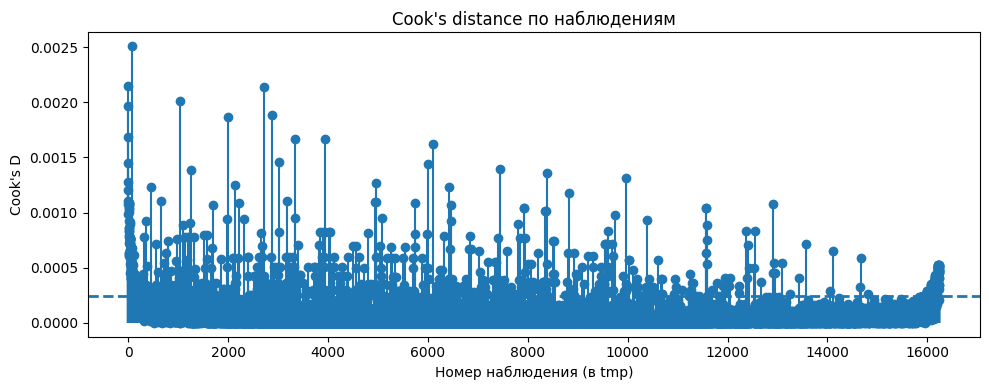

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tmp, x="passing", y="overall", alpha=0.35, label="обычные")
sns.scatterplot(data=tmp[tmp["is_influential"]], x="passing", y="overall",
                alpha=0.9, s=80, label="влиятельные")
# линия регрессии
x_line = np.linspace(tmp["passing"].min(), tmp["passing"].max(), 200)
y_line = model.predict(sm.add_constant(x_line))
plt.plot(x_line, y_line, linewidth=3)

plt.title("влиятельные наблюдения")
plt.xlabel("passing")
plt.ylabel("overall")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Residuals vs Fitted (выбросы будут далеко от 0)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tmp["fitted"], y=tmp["resid"], alpha=0.5)
plt.axhline(0, linestyle="--", linewidth=2)
plt.title("Остатки vs Предсказания")
plt.xlabel("Fitted overall")
plt.ylabel("Residual")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Leverage vs Studentized Residuals (пузырь = влиятельные наблюдения)
plt.figure(figsize=(8, 5))
sizes = 3000 * (tmp["cooks_d"] / (tmp["cooks_d"].max() if tmp["cooks_d"].max() > 0 else 1) + 0.02)
plt.scatter(tmp["leverage"], tmp["stud_resid"], s=sizes, alpha=0.4)
plt.axvline(lev_thr, linestyle="--", linewidth=2)
plt.axhline(stud_thr, linestyle="--", linewidth=2)
plt.axhline(-stud_thr, linestyle="--", linewidth=2)
plt.title("Leverage vs Studentized residuals")
plt.xlabel("Leverage")
plt.ylabel("Studentized residual")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.4 Cook's distance (стем-график)
plt.figure(figsize=(10, 4))
plt.stem(np.arange(n), tmp["cooks_d"], basefmt=" ")
plt.axhline(cooks_thr, linestyle="--", linewidth=2)
plt.title("Cook's distance по наблюдениям")
plt.xlabel("Номер наблюдения (в tmp)")
plt.ylabel("Cook's D")
plt.tight_layout()
plt.show()

## Линейная регрессия: *overall* - целевая, *pace*, *shooting*, *passing*, *dribbling*, *defending*, *physic* - заивсимая.

In [44]:
features = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]
target = "overall"

tmp = df[[target] + features].copy()

tmp = tmp.dropna()

X = tmp[features]
y = tmp[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Модель
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

rmse = lambda yt, yp: np.sqrt(mean_squared_error(yt, yp))

print("Многофакторная линейная регрессия: overall ~ pace + shooting + passing + dribbling + defending + physic")
print(f"R2_train: {r2_score(y_train, y_pred_train):.4f}")
print(f"R2_test : {r2_score(y_test,  y_pred_test ):.4f}")
print(f"MAE_test: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"RMSE_test: {rmse(y_test, y_pred_test):.4f}")
print("\nКоэффициенты:")
coef_table = pd.DataFrame({"feature": features, "coef": lr.coef_}).sort_values("coef", ascending=False)
display(coef_table)
print(f"Intercept: {lr.intercept_:.4f}")


Многофакторная линейная регрессия: overall ~ pace + shooting + passing + dribbling + defending + physic
R2_train: 0.7116
R2_test : 0.7105
MAE_test: 2.9581
RMSE_test: 3.6772

Коэффициенты:


feature      coef
3  dribbling  0.273356
5     physic  0.252426
4  defending  0.117355
1   shooting  0.113718
2    passing  0.071444
0       pace -0.015563

Intercept: 17.9341


Ожидаесо многофакторная линейная регрессия справилась сильно лучше, чем однофакторная. В среднем модель ошибается на 3-4 пунткт (MAE_test: 2.9581, RMSE_test: 3.6772). Зависимые переменные объясняют уже около 71% вариации overall (R2_test : 0.7105).

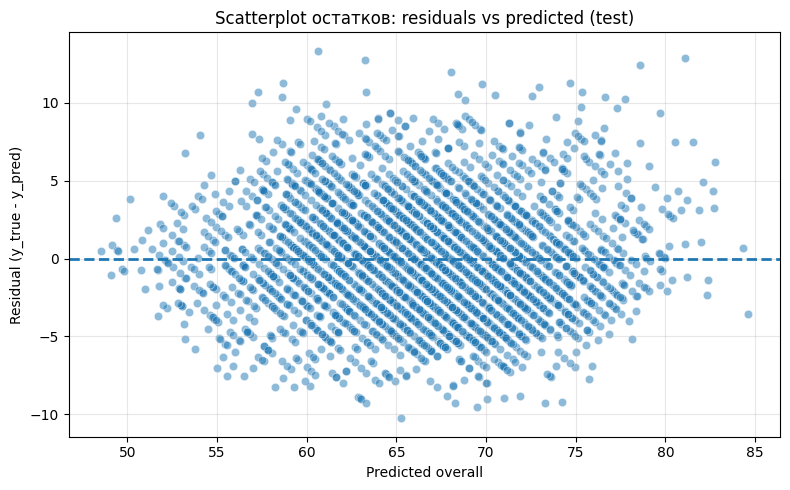

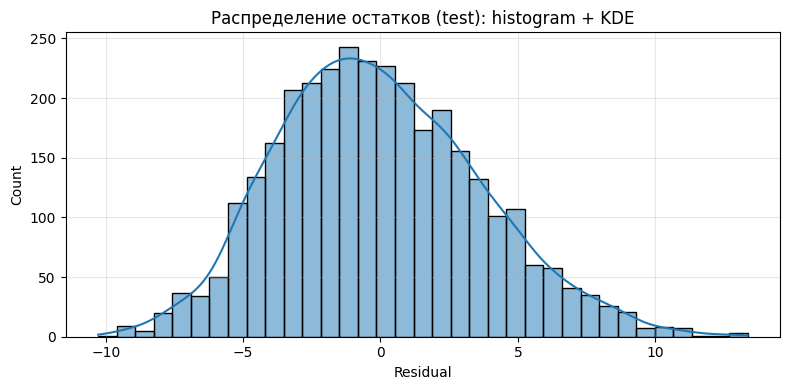

<Figure size 600x600 with 0 Axes>

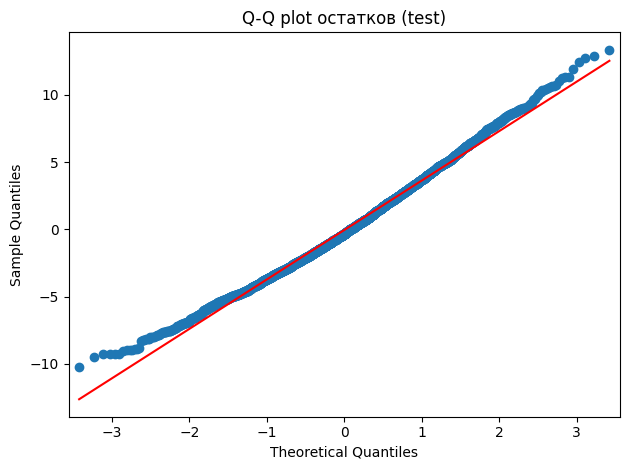

In [45]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, linestyle="--", linewidth=2)
plt.title("Scatterplot остатков: residuals vs predicted (test)")
plt.xlabel("Predicted overall")
plt.ylabel("Residual (y_true - y_pred)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Проверка нормальности остатков 

# Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков (test): histogram + KDE")
plt.xlabel("Residual")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line="s")
plt.title("Q-Q plot остатков (test)")
plt.tight_layout()
plt.show()


Распредление остатков уверенно можно сказать, что нормальное.

### Удалим выбросы и снова обучим

In [46]:
features = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]
target = "overall"

tmp = df[[target] + features].copy()
for c in [target] + features:
    tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
tmp = tmp.dropna().reset_index(drop=False).rename(columns={"index": "row_id"})

X = tmp[features]
y = tmp[target]

X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()
infl = ols.get_influence()

leverage = infl.hat_matrix_diag
stud_resid = infl.resid_studentized_external
cooks_d = infl.cooks_distance[0]

n = len(tmp)
p = X_sm.shape[1]  

# Пороги
lev_thr = 2 * p / n
stud_thr = 3
cooks_thr = 4 / n

bad_mask = (np.abs(stud_resid) > stud_thr) | (leverage > lev_thr) | (cooks_d > cooks_thr)

tmp_bad = tmp.loc[bad_mask, ["row_id", target] + features].copy()

print(f"\nНайдено 'плохих' точек: {bad_mask.sum()} из {n} ({bad_mask.mean()*100:.2f}%)")
display(tmp_bad.head(15))

# Удаляем плохие точки
tmp_clean = tmp.loc[~bad_mask].copy()

X_clean = tmp_clean[features]
y_clean = tmp_clean[target]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

lr.fit(Xc_train, yc_train)

y_pred_train = lr.predict(Xc_train)
y_pred_test = lr.predict(Xc_test)

rmse = lambda yt, yp: np.sqrt(mean_squared_error(yt, yp))

print("Многофакторная линейная регрессия: overall ~ pace + shooting + passing + dribbling + defending + physic")
print(f"R2_train: {r2_score(yc_train, y_pred_train):.4f}")
print(f"R2_test : {r2_score(yc_test,  y_pred_test ):.4f}")
print(f"MAE_test: {mean_absolute_error(yc_test, y_pred_test):.4f}")
print(f"RMSE_test: {rmse(yc_test, y_pred_test):.4f}")
print("\nКоэффициенты:")
coef_table = pd.DataFrame({"feature": features, "coef": lr.coef_}).sort_values("coef", ascending=False)
display(coef_table)
print(f"Intercept: {lr.intercept_:.4f}")


Найдено 'плохих' точек: 1549 из 16242 (9.54%)


row_id  overall  pace  shooting  passing  dribbling  defending  physic
0        0       94  87.0      92.0     92.0       96.0       39.0    66.0
1        1       93  90.0      93.0     82.0       89.0       35.0    78.0
2        2       92  91.0      85.0     87.0       95.0       32.0    58.0
3        4       91  91.0      83.0     86.0       94.0       35.0    66.0
4        5       91  76.0      86.0     92.0       86.0       61.0    78.0
5        7       90  77.0      60.0     70.0       71.0       90.0    86.0
6        8       90  74.0      76.0     89.0       89.0       72.0    66.0
7        9       90  93.0      86.0     81.0       89.0       45.0    74.0
8       10       89  96.0      84.0     78.0       90.0       39.0    75.0
9       11       89  71.0      28.0     54.0       67.0       89.0    87.0
10      12       89  70.0      91.0     79.0       81.0       47.0    83.0
11      15       89  78.0      65.0     77.0       81.0       87.0    83.0
12      16       89  68.0      46.0     58.0       60.0       90.0    82.0
13      17       89  80.0      90.0     77.0       88.0       33.0    74.0
14      18       89  72.0      68.0     75.0       73.0       87.0    85.0

Многофакторная линейная регрессия: overall ~ pace + shooting + passing + dribbling + defending + physic
R2_train: 0.7550
R2_test : 0.7613
MAE_test: 2.6108
RMSE_test: 3.1939

Коэффициенты:


feature      coef
3  dribbling  0.301961
5     physic  0.261242
1   shooting  0.097223
4  defending  0.093803
2    passing  0.065316
0       pace -0.009620

Intercept: 17.1423


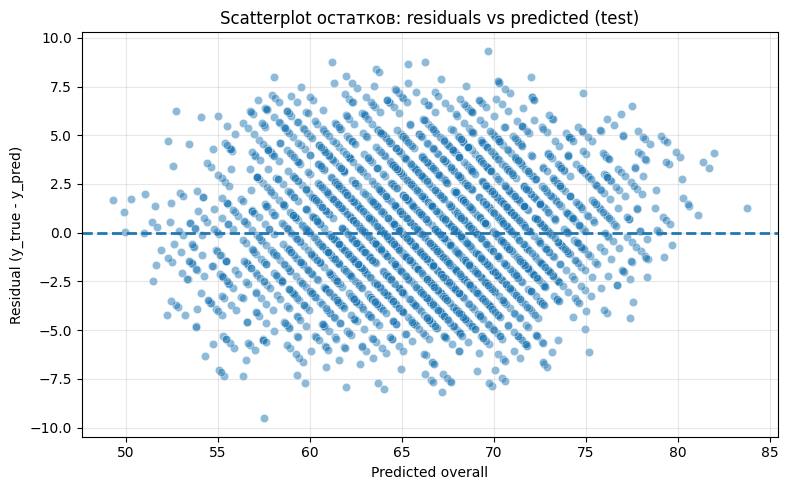

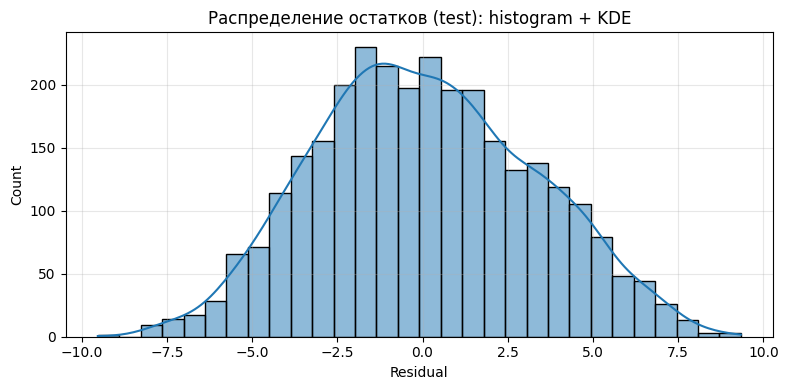

<Figure size 600x600 with 0 Axes>

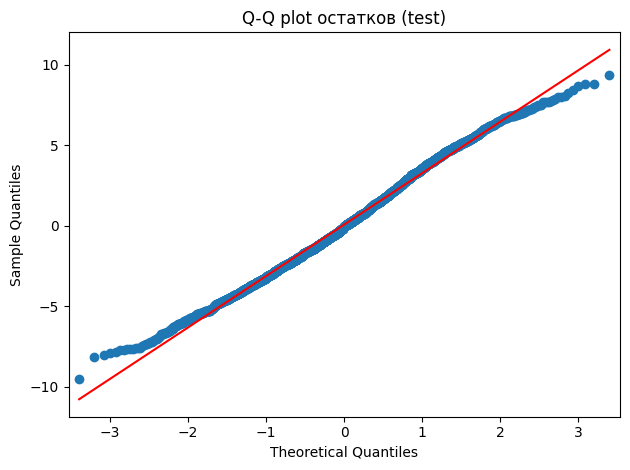

In [48]:
residuals = yc_test - y_pred_test

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, linestyle="--", linewidth=2)
plt.title("Scatterplot остатков: residuals vs predicted (test)")
plt.xlabel("Predicted overall")
plt.ylabel("Residual (y_true - y_pred)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Проверка нормальности остатков 

# Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков (test): histogram + KDE")
plt.xlabel("Residual")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line="s")
plt.title("Q-Q plot остатков (test)")
plt.tight_layout()
plt.show()


Удаление выбросов и переобучение дали неплохое улучшение результатов, это видно и по метрикам и по графикам.

# Дисперсионный анализ

# F-test and t-test

In [ ]:
features = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]
target = "overall"

tmp = df[[target] + features].copy()
for c in [target] + features:
    tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
tmp = tmp.dropna()

X = sm.add_constant(tmp[features])  
y = tmp[target]

model = sm.OLS(y, X).fit()

# Общая значимость модели (F-test)
print("=== Общая значимость модели (F-test) ===")
print(f"F-statistic: {model.fvalue:.4f}")
print(f"p-value(F):  {model.f_pvalue:.6g}")

# Значимость отдельных параметров (t-tests)
print("\n=== Значимость коэффициентов (t-tests) ===")
coef_table = pd.DataFrame({
    "coef": model.params,
    "p_value": model.pvalues
}).drop(index="const").sort_values("p_value")

display(coef_table)

=== Общая значимость модели (F-test) ===
F-statistic: 6671.3073
p-value(F):  0

=== Значимость коэффициентов (t-tests) ===


coef        p_value
physic     0.255854   0.000000e+00
dribbling  0.269295  5.632852e-290
defending  0.113098  2.816872e-253
shooting   0.112282  1.592733e-142
passing    0.074388   1.301634e-29
pace      -0.013545   5.261207e-05

F-test: p-value = 0 < 0.5, следовательно отвергаем нулевую гипотезу, overall зависит от совокупности параметров pace, shooting, passing, dribbling, defending, physic.
t-test: по t-тестам все коэффициенты при признаках значимы (p<0.05), то есть каждый из указанных параметров вносит статистически значимый вклад в объяснение overall.

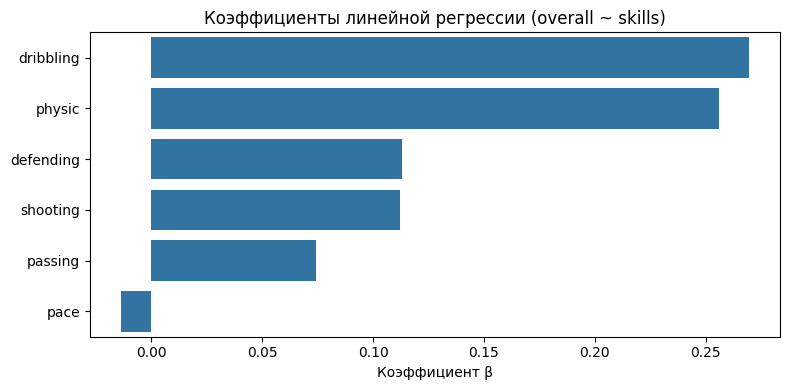

In [ ]:
coef_table = pd.DataFrame({
    "feature": model.params.drop("const").index,
    "coef": model.params.drop("const").values
}).sort_values("coef", ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=coef_table, x="coef", y="feature")
plt.title("Коэффициенты линейной регрессии (overall ~ skills)")
plt.xlabel("Коэффициенты регрессии")
plt.ylabel("")
plt.tight_layout()
plt.show()